## Import Package

In [421]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats
from scipy import stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

#spliiting data train and test
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Function
def missing(df):
    missing = df.isnull().sum()
    percent = round(100*(missing/df.shape[0]),2)
    types = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"missing":missing,
                        "percent_missing":percent,
                        "types":types,
                        "n_unique":n_unique}).sort_values("percent_missing",ascending=False)

In [422]:
# load dataset
data = pd.read_csv('data/train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

The house price dataset contains 1460 rows and 80 columns

79 are predictive variables and 1 is the target variable: SalePrice

## Analysis

**The following will be analyzed:**

1. Target variable
2. Variable type (categorical and numeric)
3. Missing data
4. Numeric variables
- Discrete
- Continuous
- Distribution
- Transformation

5. Categorical variables
- Cardinality
- Rare labels
- Custom mapping

## Goal

Let's start by exploring the target distribution.

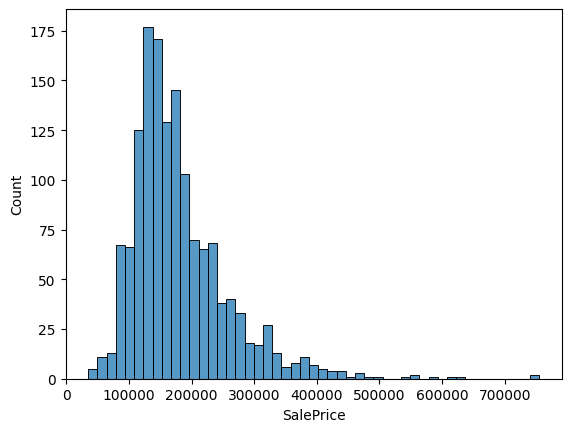

In [423]:
# histogran to evaluate target distribution

sns.histplot(data=data, x='SalePrice')
plt.show()

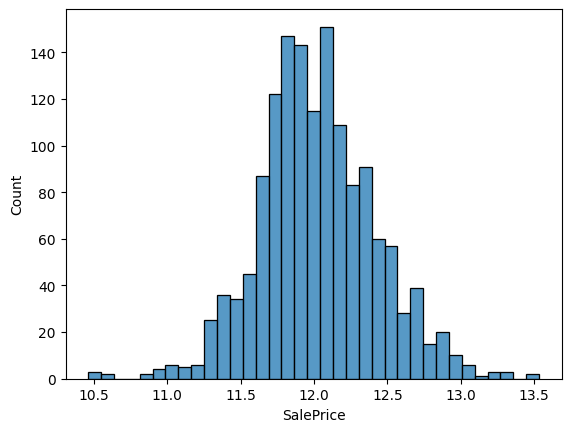

In [424]:
# fetaure engineering: transformation with LOG

sns.histplot(data=np.log(data['SalePrice']))
plt.show()

We can see that logarithm transformation affect the distribution into normal

## Feature Selection: Missing Values

In [425]:
missing(data)

missing  percent_missing   types  n_unique
PoolQC            1453            99.52  object         3
MiscFeature       1406            96.30  object         4
Alley             1369            93.77  object         2
Fence             1179            80.75  object         4
MasVnrType         872            59.73  object         3
...                ...              ...     ...       ...
MoSold               0             0.00   int64        12
YrSold               0             0.00   int64         5
SaleType             0             0.00  object         9
SaleCondition        0             0.00  object         6
SalePrice            0             0.00   int64       663

[81 rows x 4 columns]

In [426]:
# Making variabels that includes missing values within more than 50%

var_drop = [var for var in data.columns if data[var].isnull().sum() > 0.5*data.shape[0]]
var_drop

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [427]:
# Drop those variabels
data = data.drop(var_drop, axis=1)

In [428]:
data.shape[1]

76

In [429]:
data = data.set_index('Id')

In [430]:
# data['MasVnrType']
data.shape

(1460, 75)

In [431]:
data

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1             60       RL         65.0     8450   Pave      Reg         Lvl   
2             20       RL         80.0     9600   Pave      Reg         Lvl   
3             60       RL         68.0    11250   Pave      IR1         Lvl   
4             70       RL         60.0     9550   Pave      IR1         Lvl   
5             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1456          60       RL         62.0     7917   Pave      Reg         Lvl   
1457          20       RL         85.0    13175   Pave      Reg         Lvl   
1458          70       RL         66.0     9042   Pave      Reg         Lvl   
1459          20       RL         68.0     9717   Pave      Reg         Lvl   
1460          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
Id                                                                      
1       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
2       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
3       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
4       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
5       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1456    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1457    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1458    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1459    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1460    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
1        1Fam     2Story            7            5       2003          2003   
2        1Fam     1Story            6            8       1976          1976   
3        1Fam     2Story            7            5       2001          2002   
4        1Fam     2Story            7            5       1915          1970   
5        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1456     1Fam     2Story            6            5       1999          2000   
1457     1Fam     1Story            6            6       1978          1988   
1458     1Fam     2Story            7            9       1941          2006   
1459     1Fam     1Story            5            6       1950          1996   
1460     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
Id                                                                      
1        Gable  CompShg     VinylSd     VinylSd       196.0        Gd   
2        Gable  CompShg     MetalSd     MetalSd         0.0        TA   
3        Gable  CompShg     VinylSd     VinylSd       162.0        Gd   
4        Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA   
5        Gable  CompShg     VinylSd     VinylSd       350.0        Gd   
...        ...      ...         ...         ...         ...       ...   
1456     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1457     Gable  CompShg     Plywood     Plywood       119.0        TA   
1458     Gable  CompShg     CemntBd     CmentBd         0.0        Ex   
1459       Hip  CompShg     MetalSd     MetalSd         0.0        TA   
1460     Gable  CompShg     HdBoard     HdBoard         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtEx

## Missing Values Analysis

In [432]:
# split variables categorical dan numerical

cat_vars = [var for var in data.columns if data[var].dtype == 'O'] # O = object data type

# MSsubClass is categorical variable if we see the data desciption, put in cat_vars
cat_vars = cat_vars + ['MSSubClass']


num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

In [433]:
# making new list that include variable with NaN for analysis
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

data[vars_with_na].isnull().mean().sort_values(ascending=False)

FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [434]:
# split data catgorical and numerical for missing value analysis
cat_na = [var for var in cat_vars if var in vars_with_na] # categorical variable with na
num_na = [var for var in num_vars if var in vars_with_na] # numerical variable with na

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  11
Number of numerical variables with na:  3


In [435]:
def analyse_na_value(df, var):
    # backup
    df = df.copy()

    # missing value observarsion with encoding, 1 is missing and 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # create grup by for mean analysis sale price
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

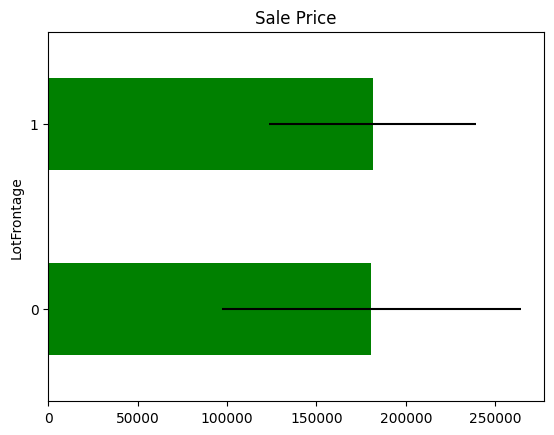

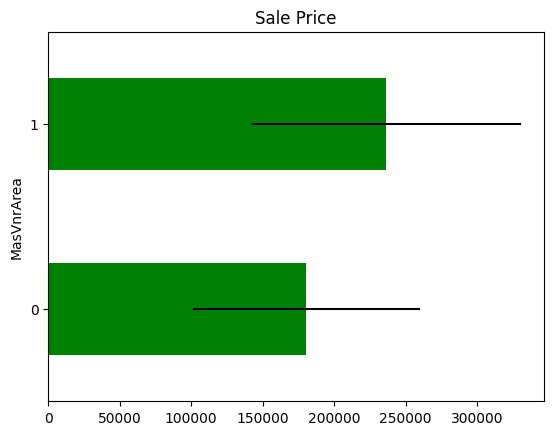

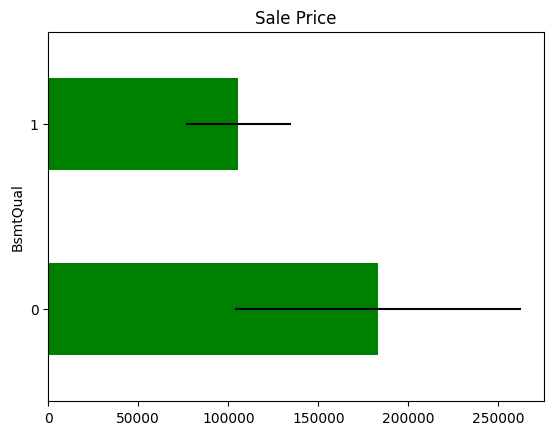

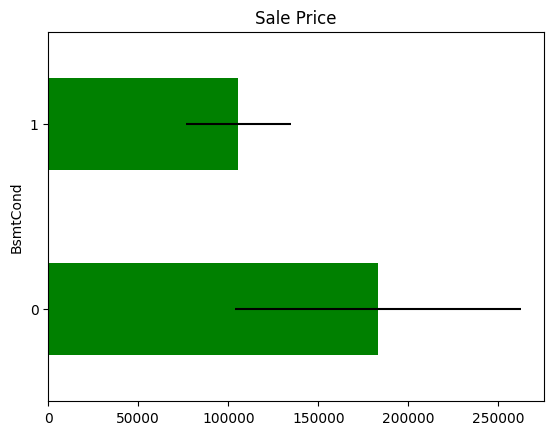

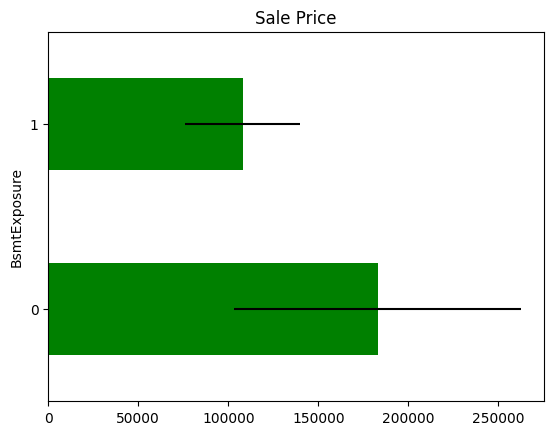

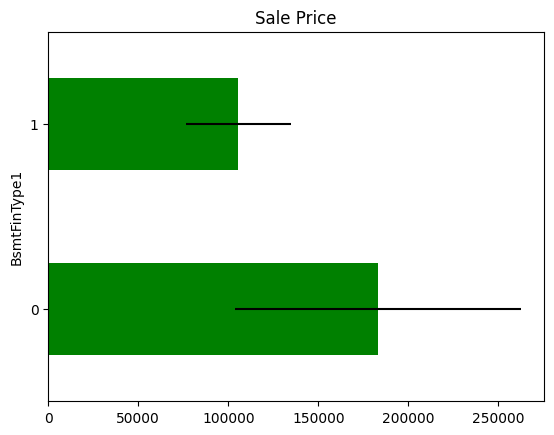

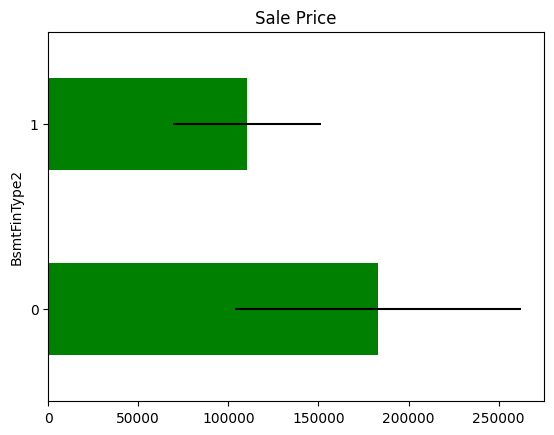

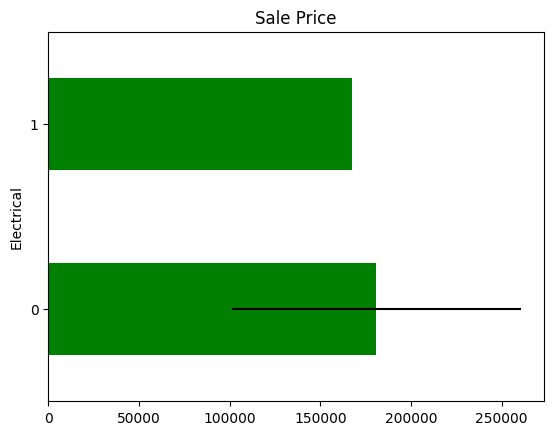

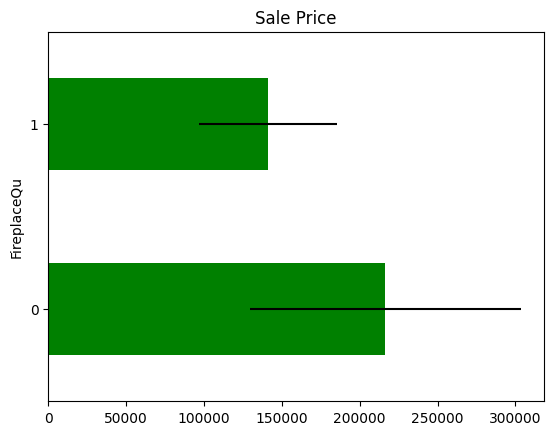

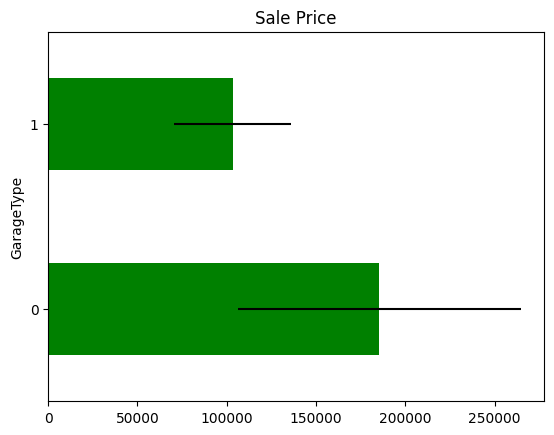

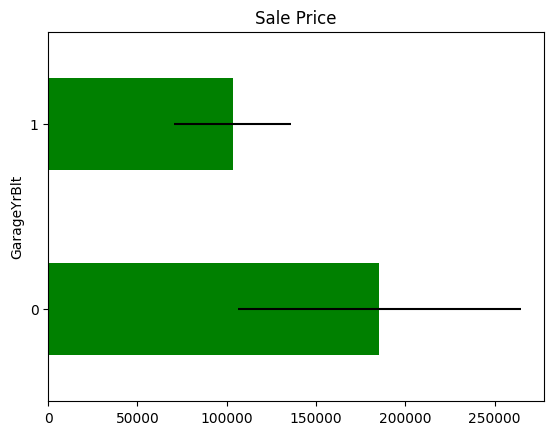

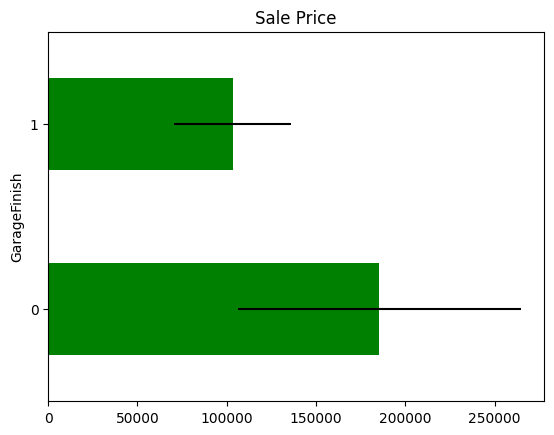

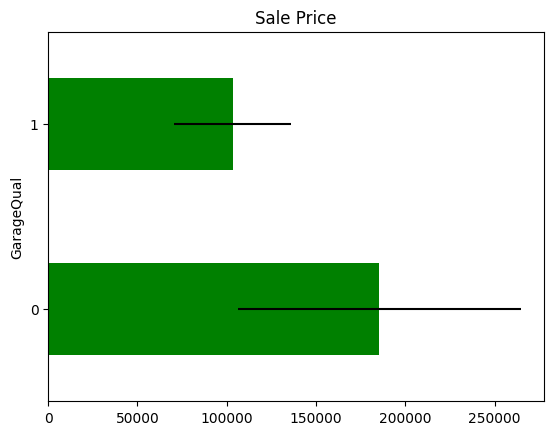

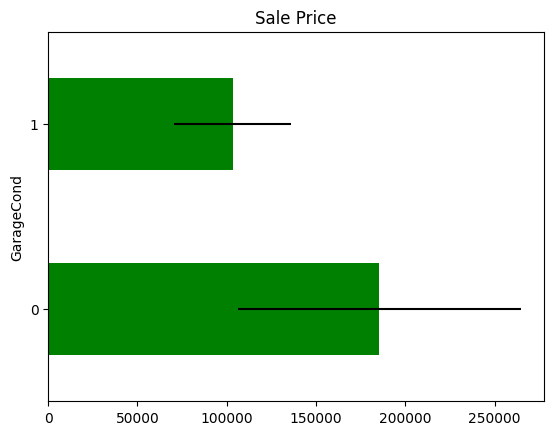

In [436]:
# looping
for var in vars_with_na:
    analyse_na_value(data, var)

We can see that few variables that contain NaN give us an information, this can be seen from the difference in the average. variables other than LotFrontAge are good predictors.

# Features Engineering: Creation
## Temporal Variables

Here we have 4 time variables: <br>

- YearBuilt: year the house was built
- YearRemodAdd: year the house was remodeled
- GarageYrBlt: year the garage was built
- YrSold: year the house was sold

we can extract information from these 4 variables for analysis, such as the age of the house = YrSold - YearBuilt

In [437]:
# list time variable 

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [438]:
#eksplore
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

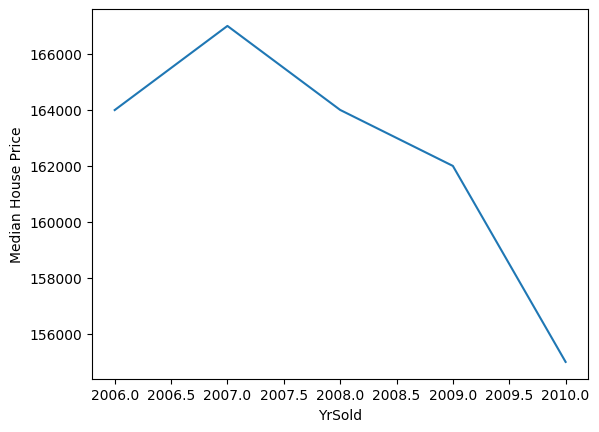

In [439]:
#plot median saleprice

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.show()

There is something odd about the sales price, where the house price is decreasing over time, of course this is not normal, we need further analysis to determine why this could happen.

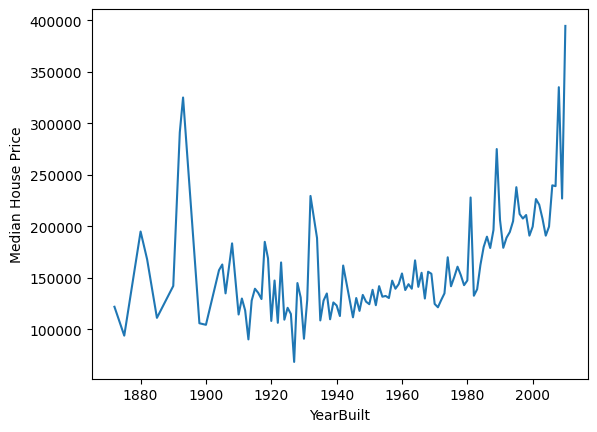

In [440]:
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.show()

we can see that more younger the house more expensive the price

now let see the if the year variables affect the price of the house

In [441]:
def analyse_year_vars(df, var): # function to analyse year variable
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.legend()
    plt.show()

In [442]:
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

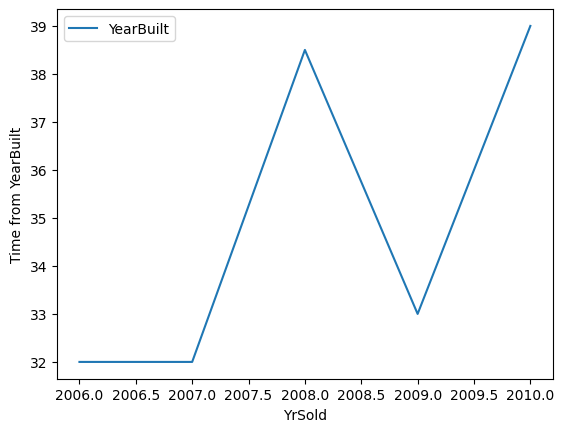

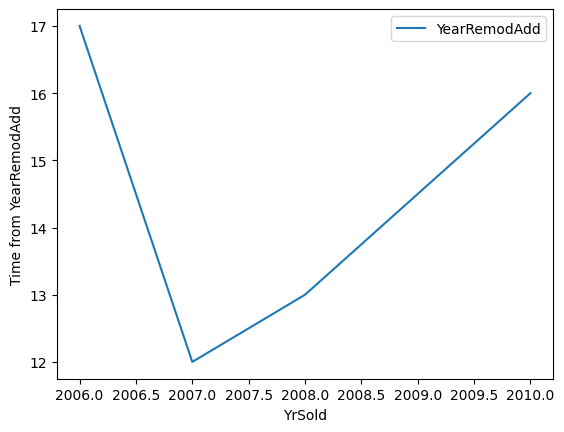

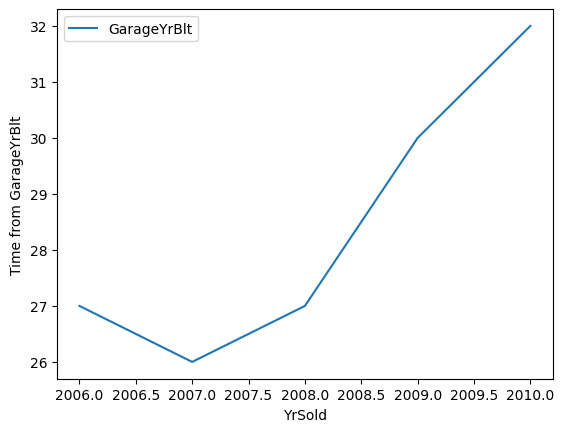

In [443]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

From the plot, it can be seen that the houses that were sold in the last few years have a garage that is older and has not been renovated, which may explain why the sale prices are lower in recent years, at least in this dataset.

Now we can plot time since last renovated, or time since built, and sale price, to see if there is any relationship.

In [444]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    sns.regplot(data=df,x=var, y='SalePrice',
               line_kws={"color":"red"},
               scatter_kws={"color":"g"})
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

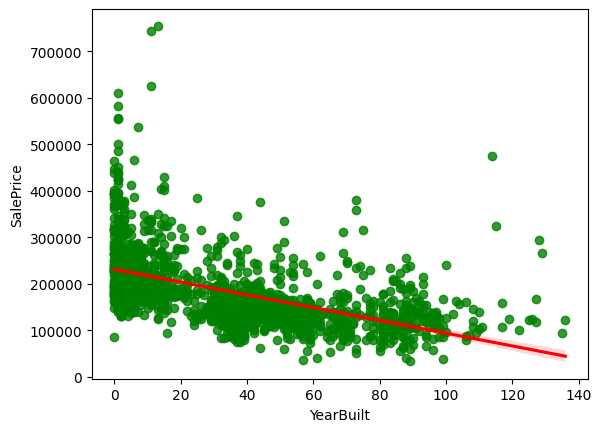

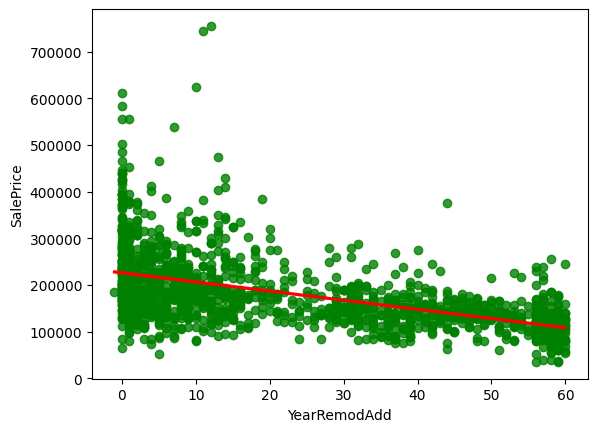

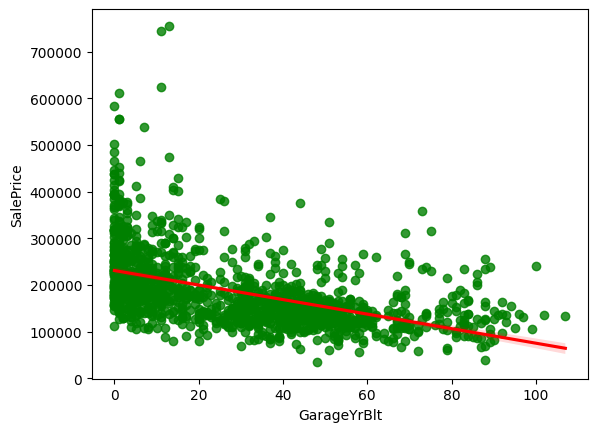

In [445]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

It can be seen that there is a tendency for prices to decrease, with older houses. In other words, the longer the time between the house being built or renovated and the date of sale, the lower the selling price will be. 

which makes sense, because this means the house will look older, and will likely need repairs.

Now let see the Discrete Variables

## Discrete variables

In [446]:
# Making Variable Discrete
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [447]:
discrete_vars

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

This Discrete Variable is tendency to be Qualitative (Qual) or Rating (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the size of the space (KitchenAbvGr). 

Ofcourse , it is expected to be higher price, with a larger number.

MoSold is the month in which the house is sold.

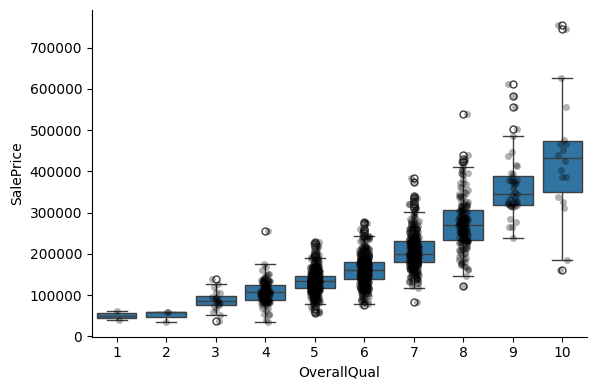

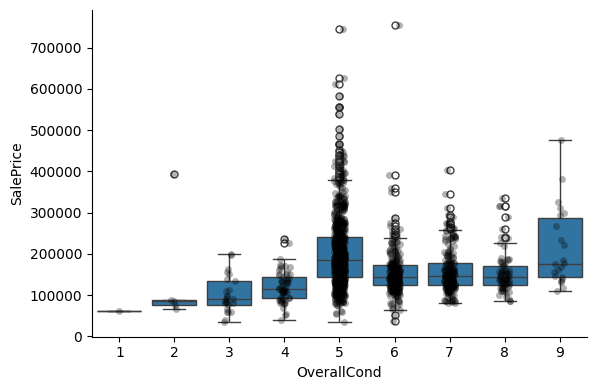

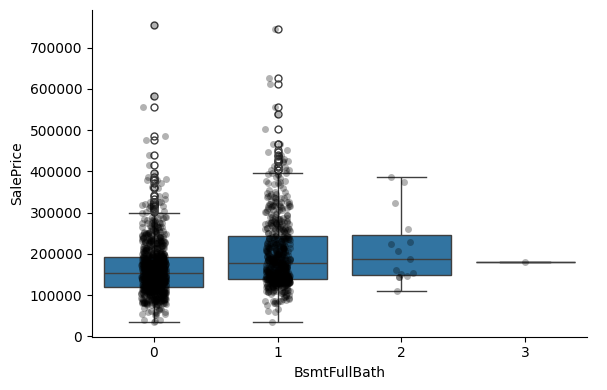

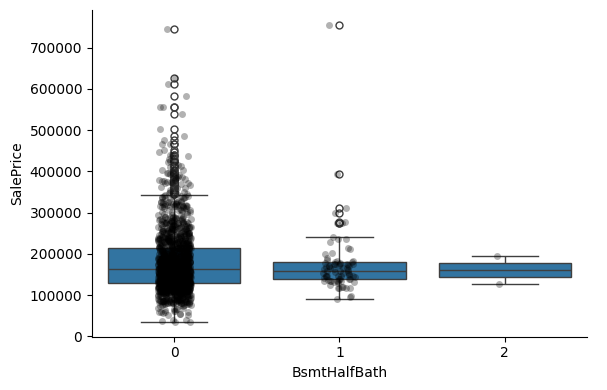

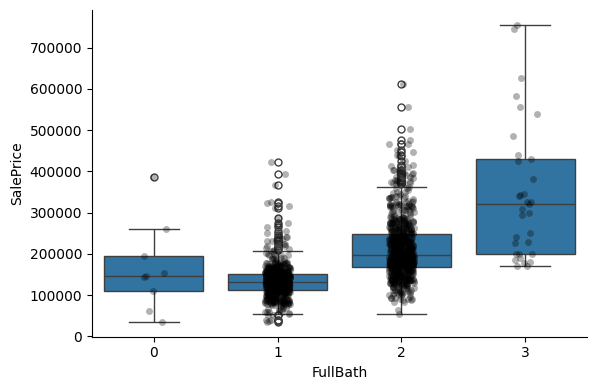

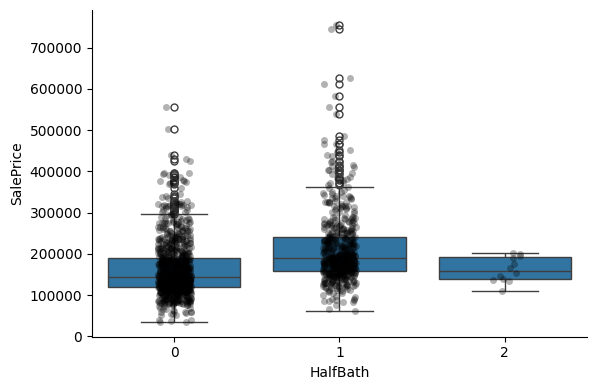

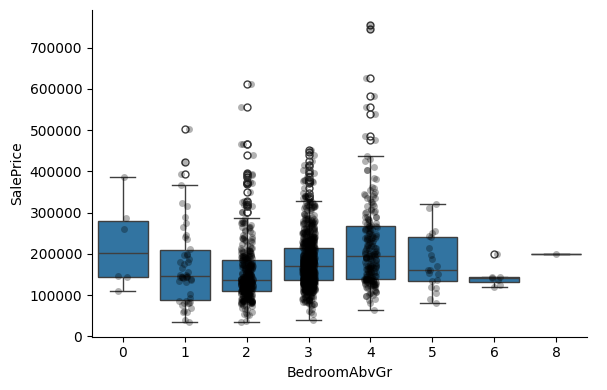

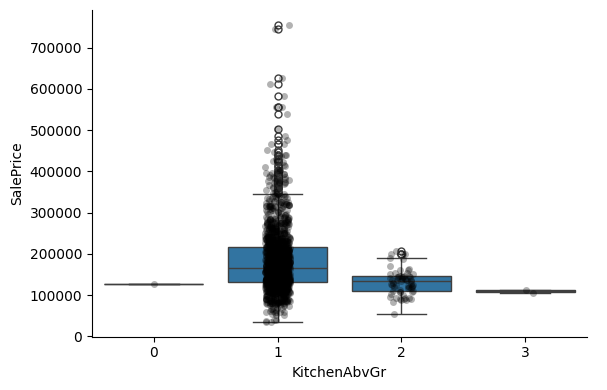

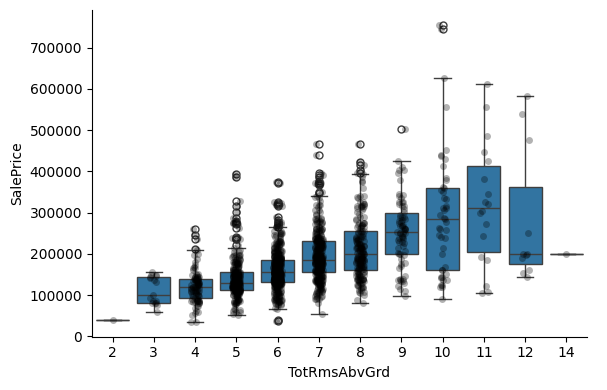

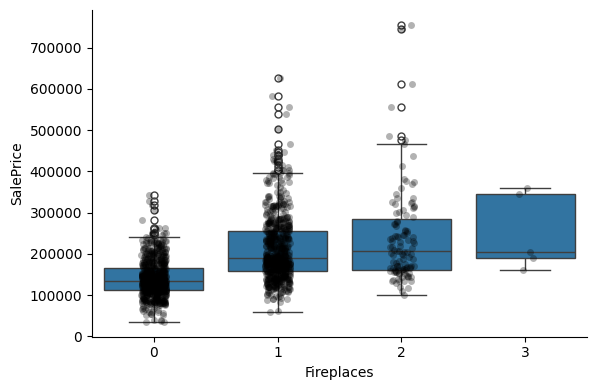

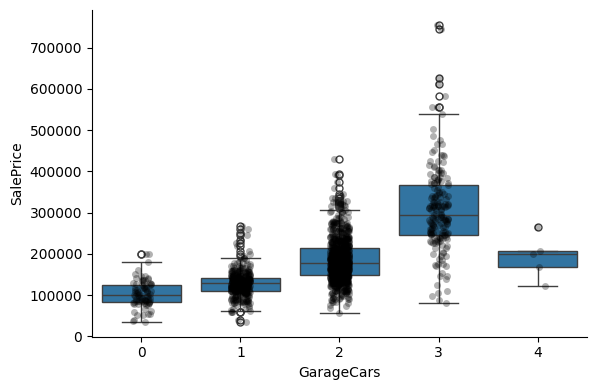

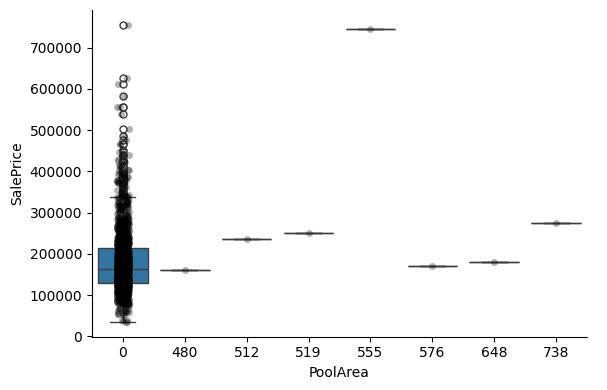

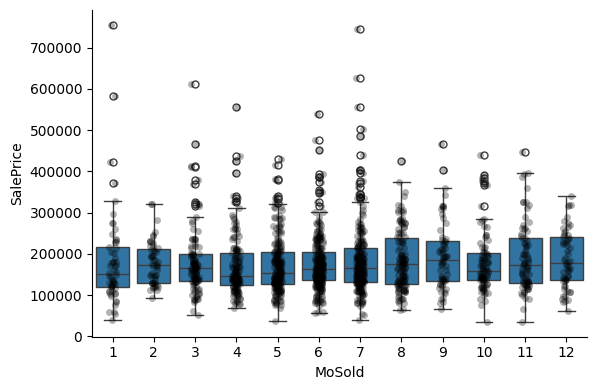

In [448]:
for var in discrete_vars:
    # make boxplot with Catplot (categorical plot)
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most of the discrete numerical variables, there appears to be an increase in price, quality, or overall condition, or number of rooms, or surface area.

For some variables, no such trend is visible. It is likely that these variables are not good predictors of price, such as the month of the house was sold, the pool area.

## Continious Variabels

In [449]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


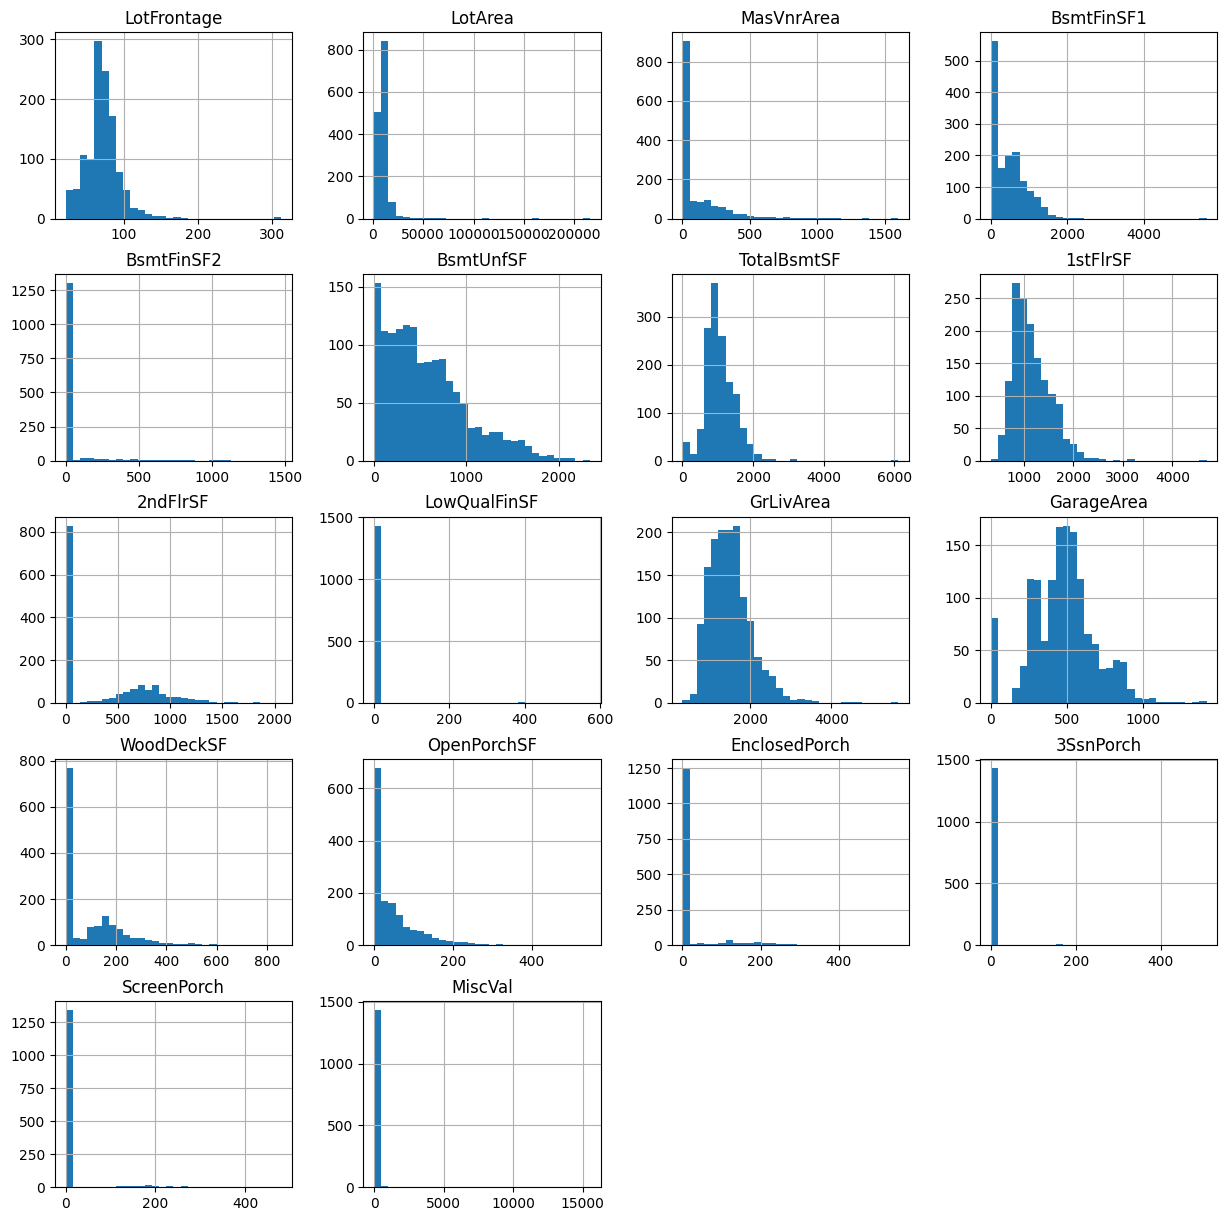

In [450]:
#check the distribution of data
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

The Variables does not have a normal distribution. And there are some that are very skew like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, changing the variable to improve the spread of the values, improves the model performance. But it is not possible that the transformation will help to dramatically change the distribution of the super skew variable.

We can apply the Yeo-Johnson transformation to the variables like LotFrontage, LotArea, BsmUnfSF, and the binary transformation to the variables like 3SsnPorch, ScreenPorch, and MiscVal.

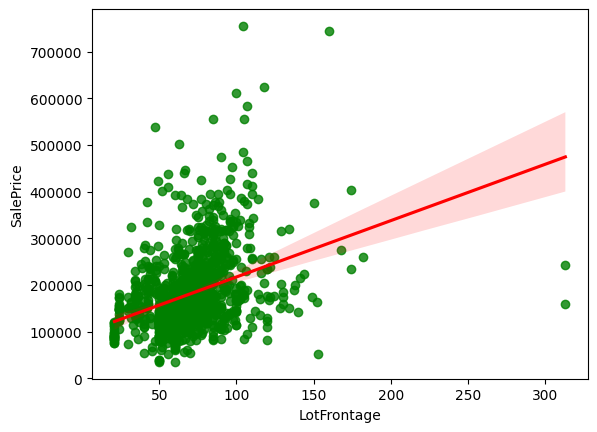

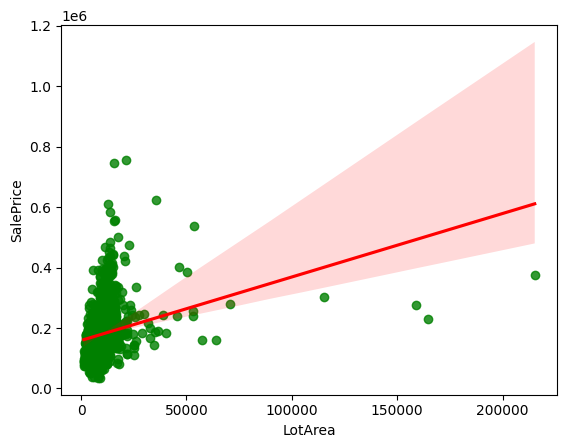

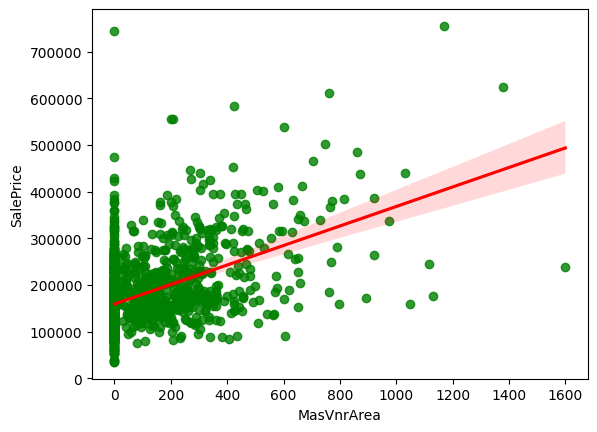

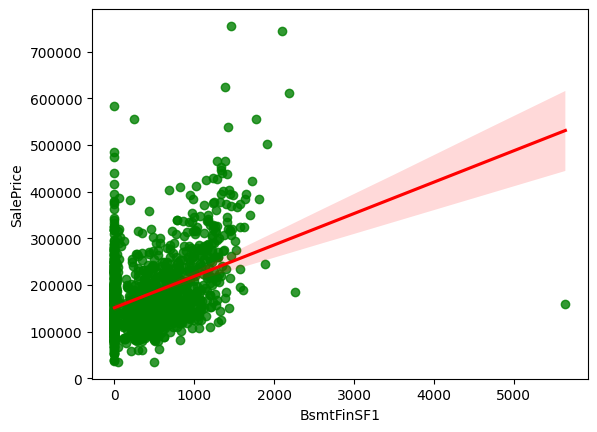

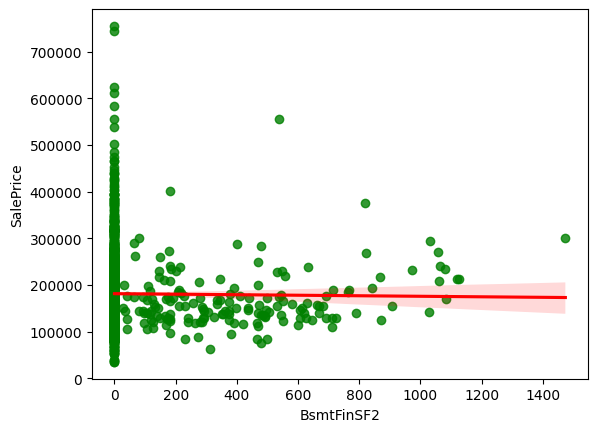

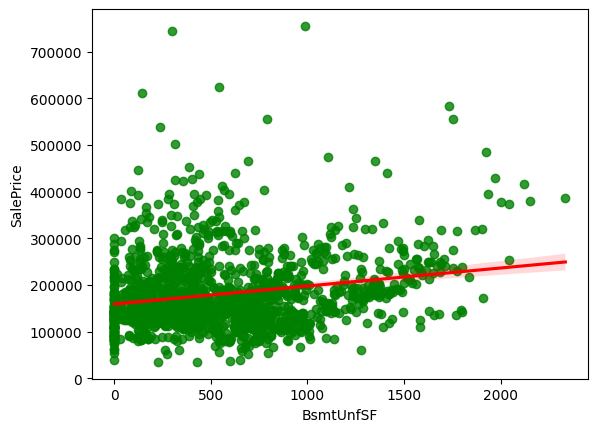

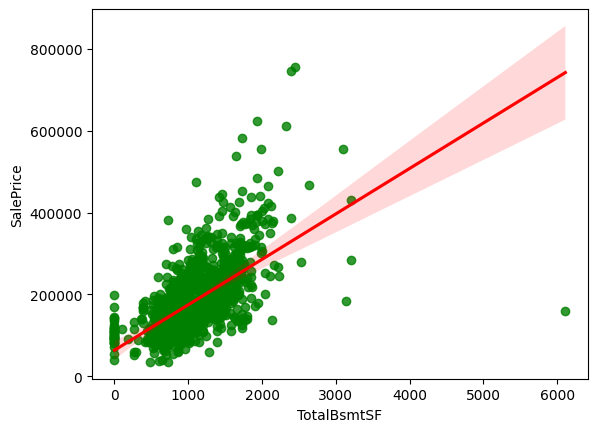

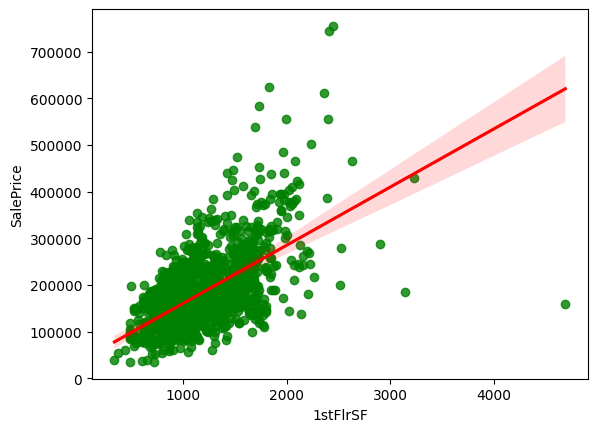

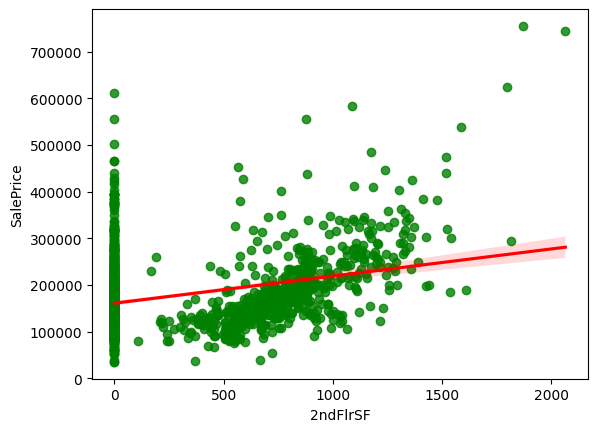

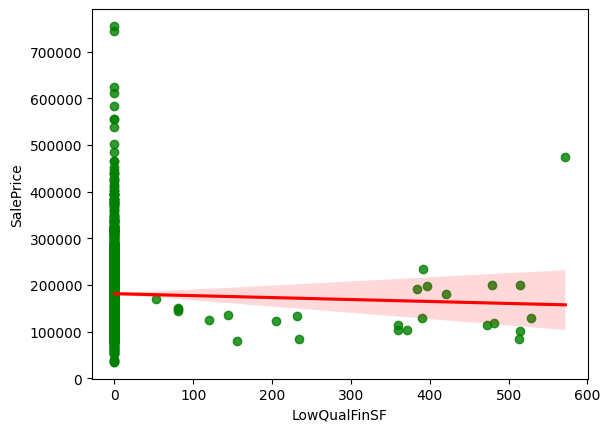

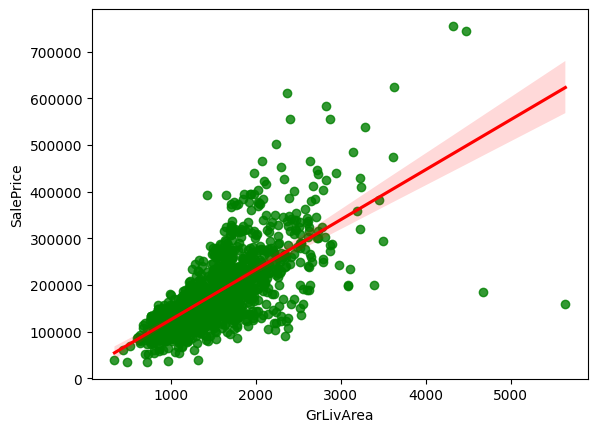

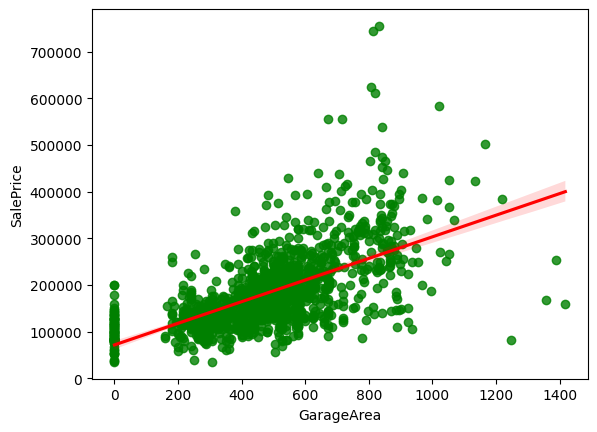

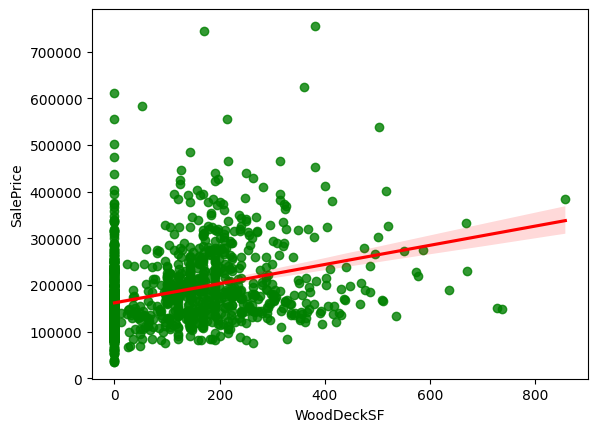

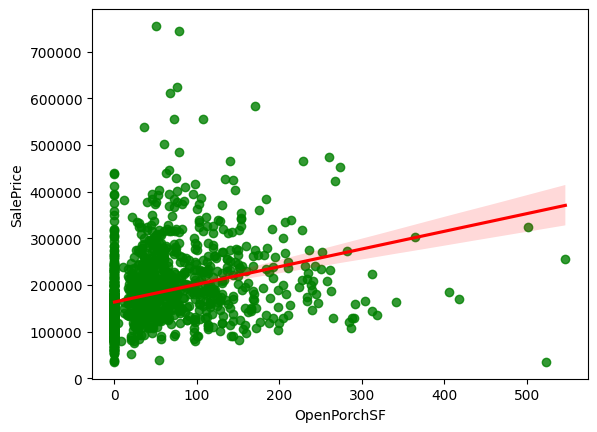

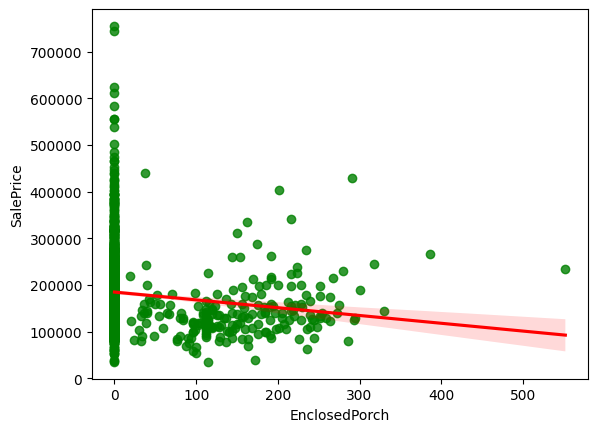

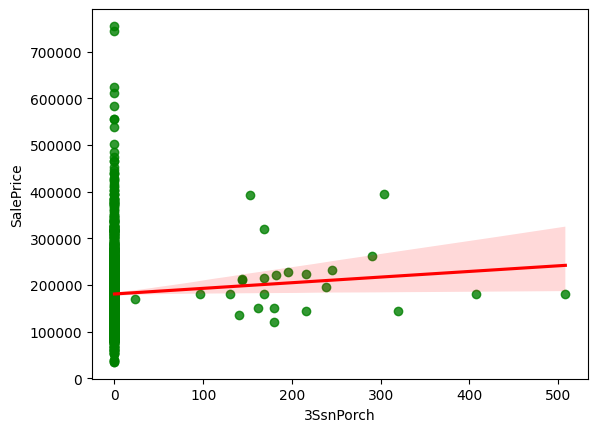

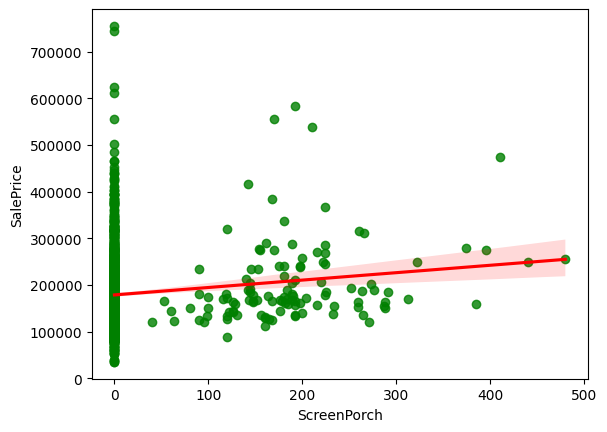

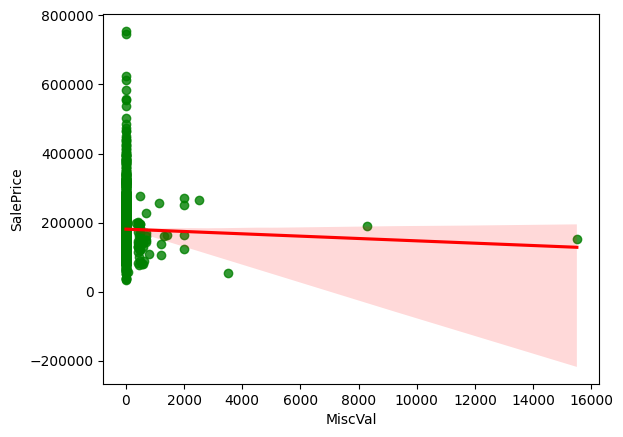

In [451]:
for x in cont_vars:
    plt.figure()
    sns.regplot(data=data, x=x, y='SalePrice',
                line_kws={"color":"red"},
                scatter_kws={"color":"g"})
    plt.ylabel('SalePrice')
    plt.xlabel(x)
    plt.show()

In [452]:
# making list variable skew
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

# making list variable continuous
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

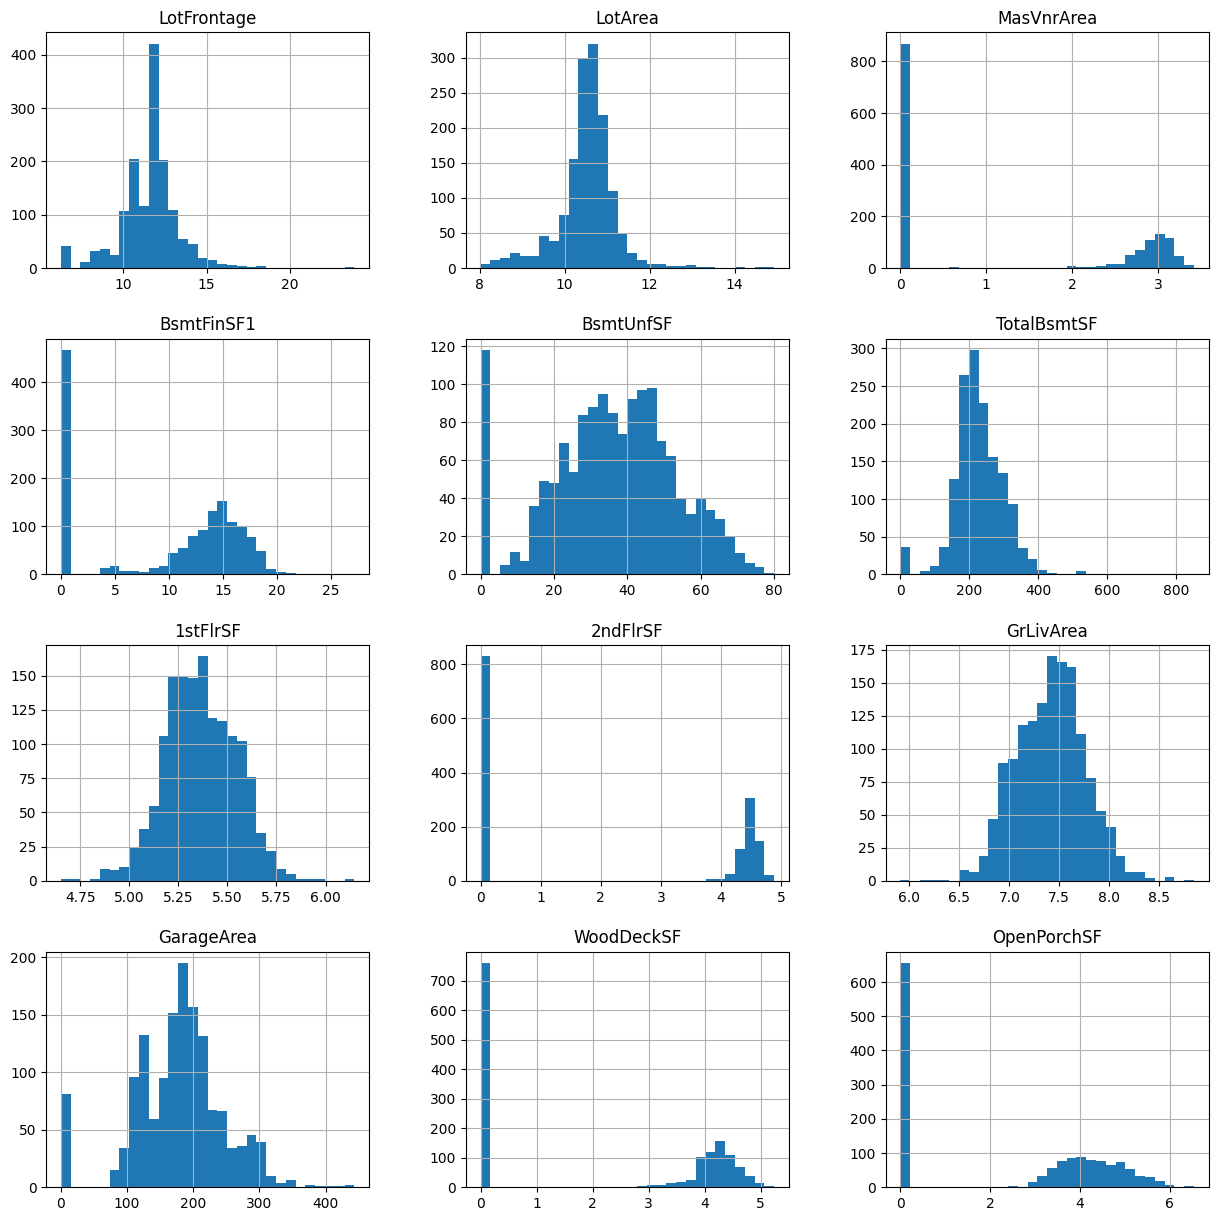

In [453]:
# temporary copy of the data
tmp = data.copy()

for var in cont_vars:
    # Ensure no NaN or infinite values
    if not data[var].replace([np.inf, -np.inf], np.nan).dropna().empty:
        # Fill missing values with the median (or another strategy)
        tmp[var] = data[var].replace([np.inf, -np.inf], np.nan).fillna(data[var].median())
        # Transform the variable - Yeo-Johnson
        tmp[var], param = stats.yeojohnson(tmp[var])
    else:
        print(f"Skipping variable {var} due to insufficient valid data.")
    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [454]:
tmp.head()

MSSubClass MSZoning  LotFrontage    LotArea Street LotShape LandContour  \
Id                                                                            
1           60       RL    11.316795  10.427531   Pave      Reg         Lvl   
2           20       RL    12.535726  10.596446   Pave      Reg         Lvl   
3           60       RL    11.572628  10.807341   Pave      IR1         Lvl   
4           70       RL    10.874834  10.589520   Pave      IR1         Lvl   
5           60       RL    12.838021  11.124530   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                             
1     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2     AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
3     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4     AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
5     AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                           
1      2Story            7            5       2003          2003     Gable   
2      1Story            6            8       1976          1976     Gable   
3      2Story            7            5       2001          2002     Gable   
4      2Story            7            5       1915          1970     Gable   
5      2Story            8            5       2000          2000     Gable   

   RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
Id                                                                    
1   CompShg     VinylSd     VinylSd    2.967318        Gd        TA   
2   CompShg     MetalSd     MetalSd    0.000000        TA        TA   
3   CompShg     VinylSd     VinylSd    2.913979        Gd        TA   
4   CompShg     Wd Sdng     Wd Shng    0.000000        TA        TA   
5   CompShg     VinylSd     VinylSd    3.115499        Gd        TA   

   Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
Id                                                                      
1       PConc       Gd       TA           No          GLQ   15.235367   
2      CBlock       Gd       TA           Gd          ALQ   16.750862   
3       PConc       Gd       TA           Mn          GLQ   13.632899   
4      BrkTil       TA       Gd           No          ALQ   10.593523   
5       PConc       Gd       TA           Av          GLQ   14.902455   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
Id                                                                      
1           Unf           0  20.452661   198.284296    GasA        Ex   
2           Unf           0  28.330975   264.601146    GasA        Ex   
3           Unf           0  35.046585   209.206787    GasA        Ex   
4           Unf           0  39.069650   180.779931    GasA        Gd   
5           Unf           0  37.229495   246.150777    GasA        Ex   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Id                                                                      
1           Y      SBrkr  5.219622  4.527843             0   7.600485   
2           Y      SBrkr  5.442275  0.000000             0   7.284380   
3           Y      SBrkr  5.261495  4.533734             0   7.645781   
4           Y      SBrkr  5.286701  4.475937             0   7.604740   
5           Y      SBrkr  5.387108  4.615200             0   7.862156   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1              1             0         2         1             3   
2              0             1         2         0             3   
3              1             0      

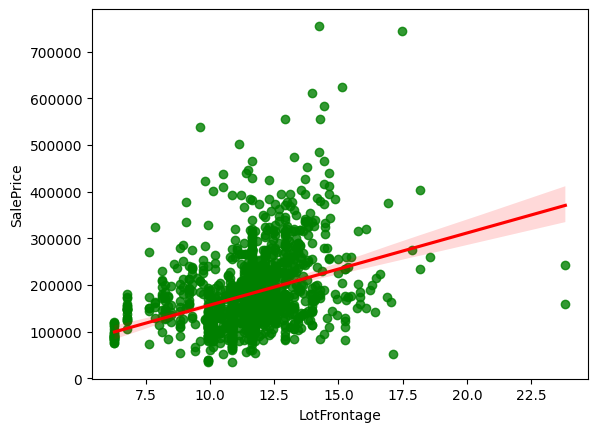

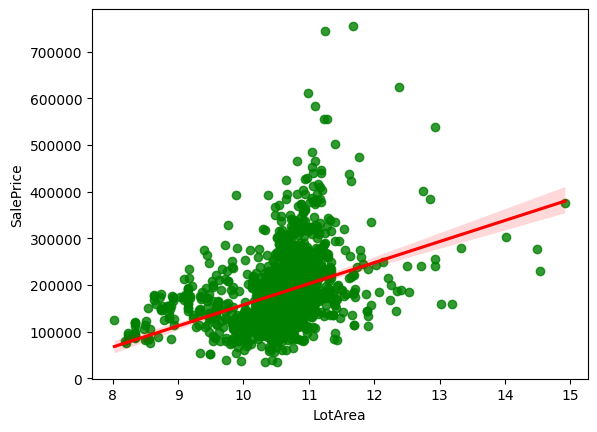

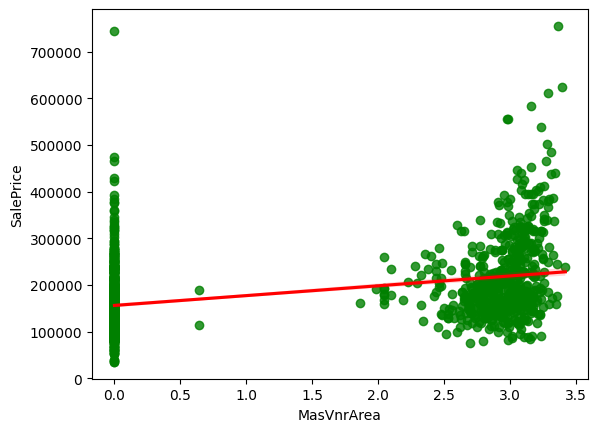

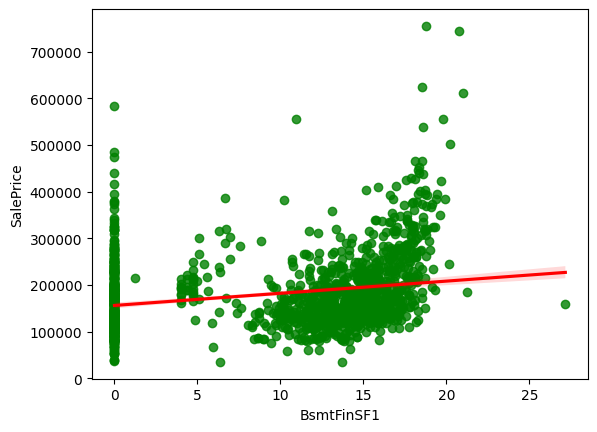

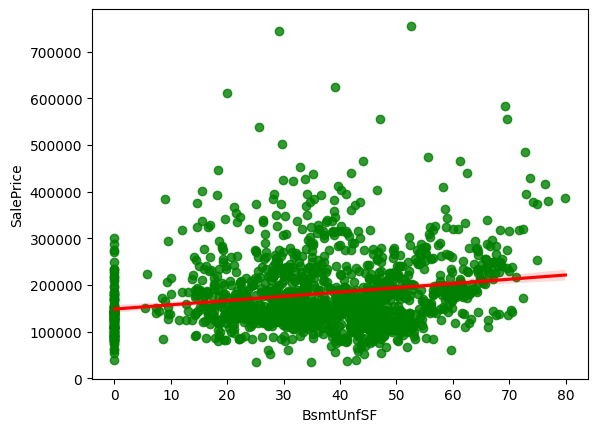

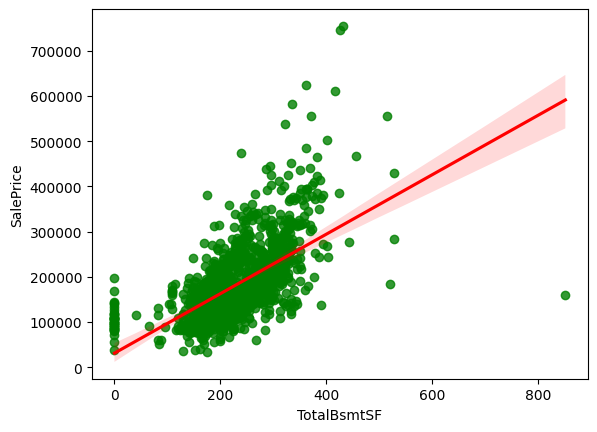

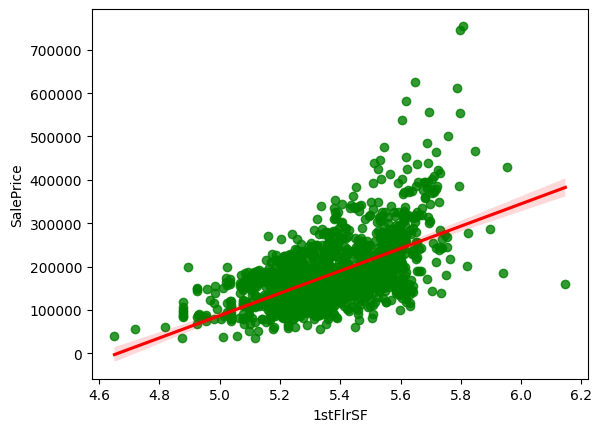

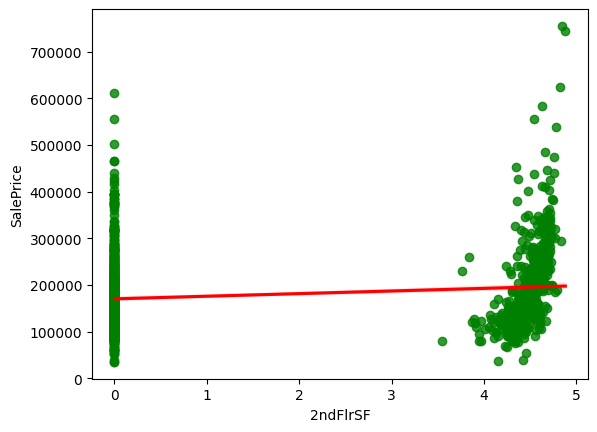

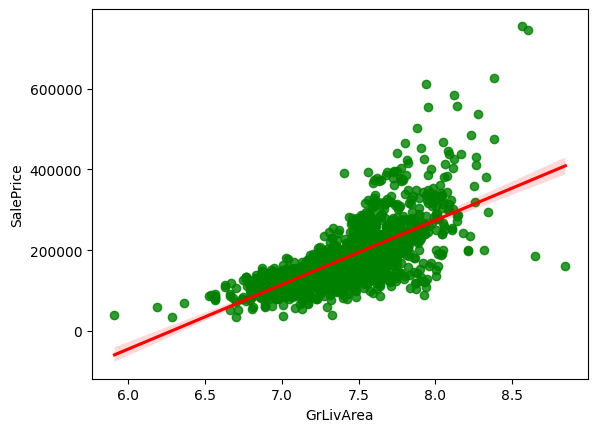

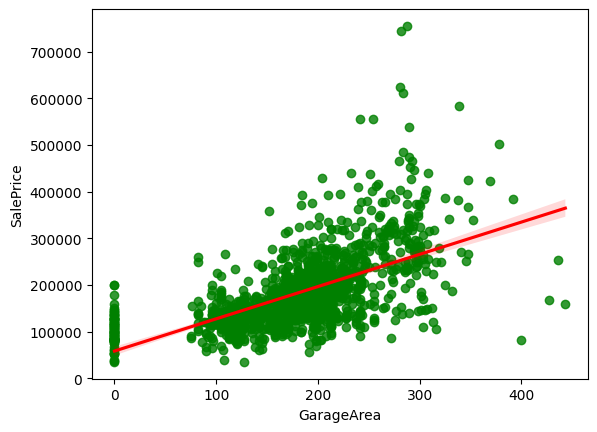

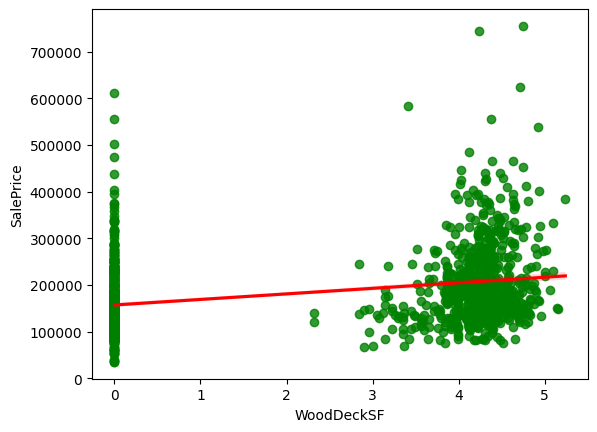

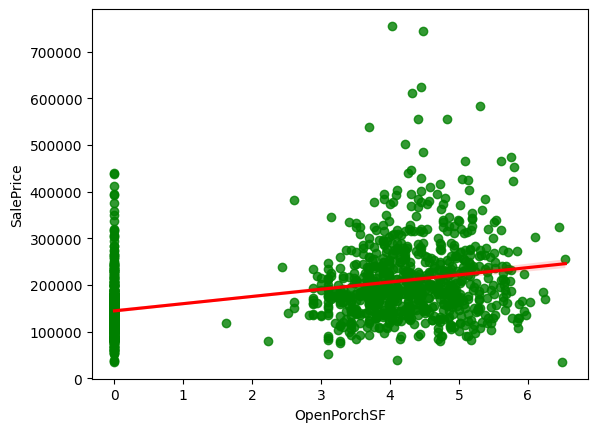

In [455]:
for x in cont_vars:
    plt.figure()
    sns.regplot(data=tmp, x=x, y='SalePrice',
                line_kws={"color":"red"},
                scatter_kws={"color":"g"})
    plt.ylabel('SalePrice')
    plt.xlabel(x);

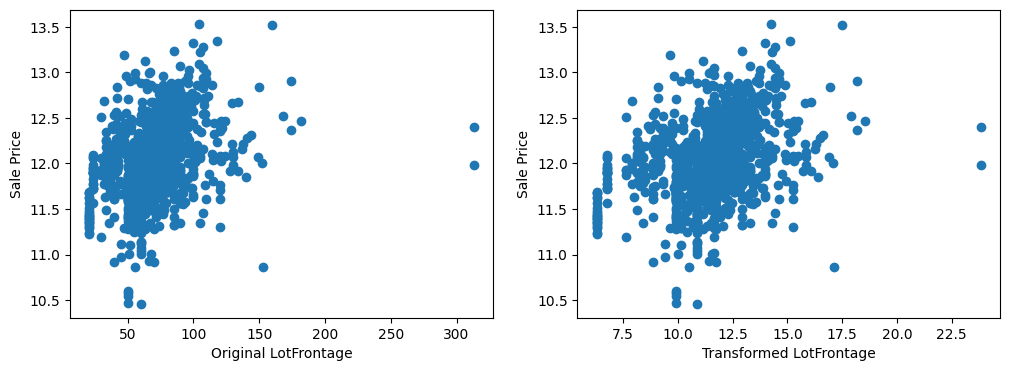

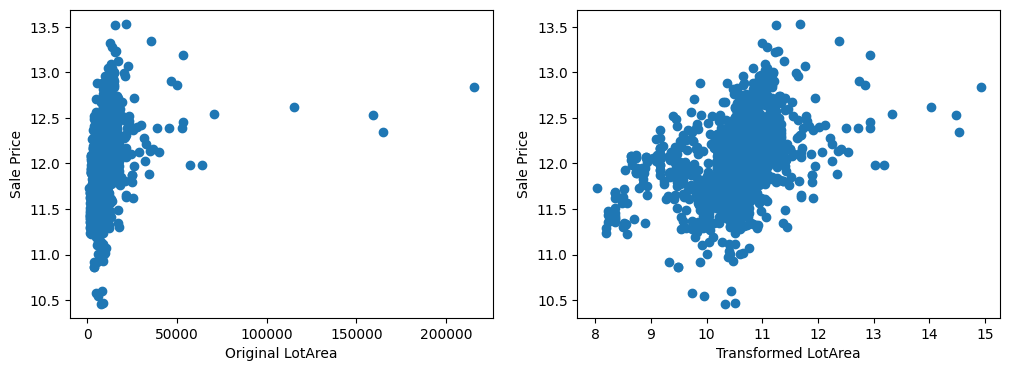

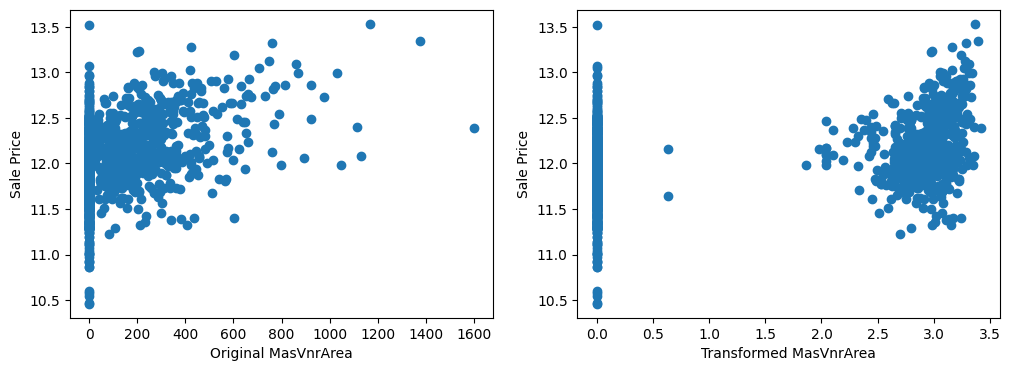

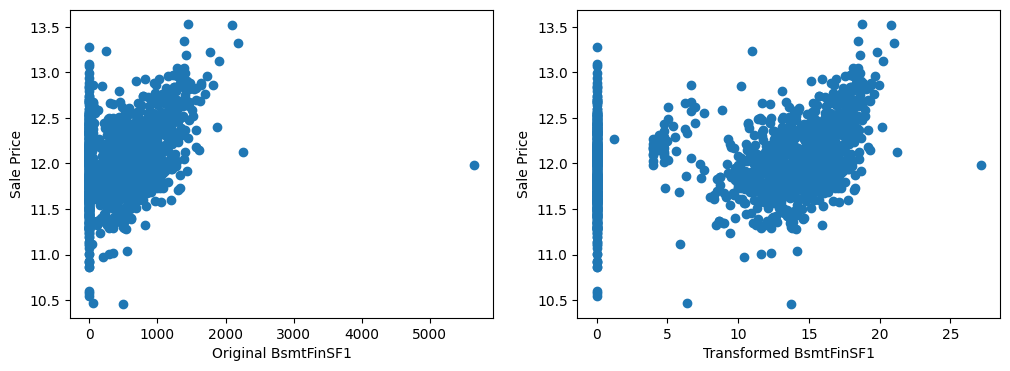

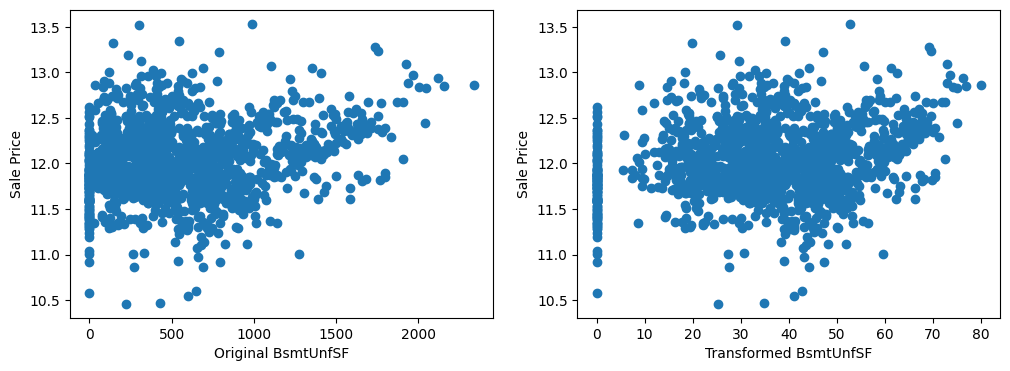

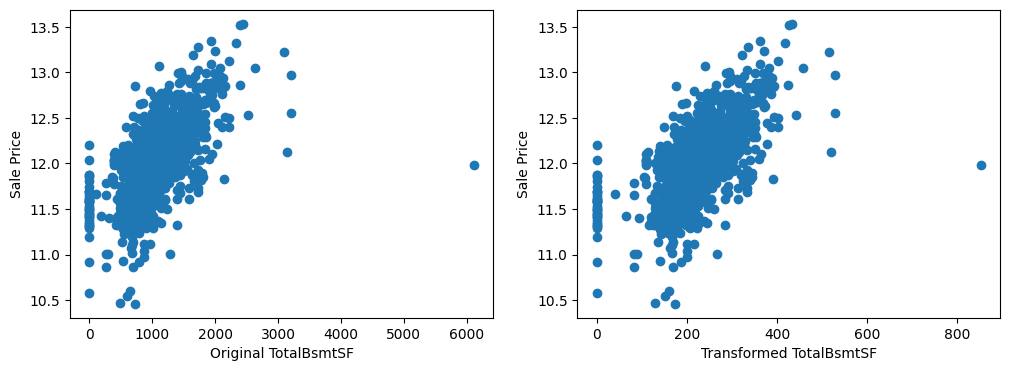

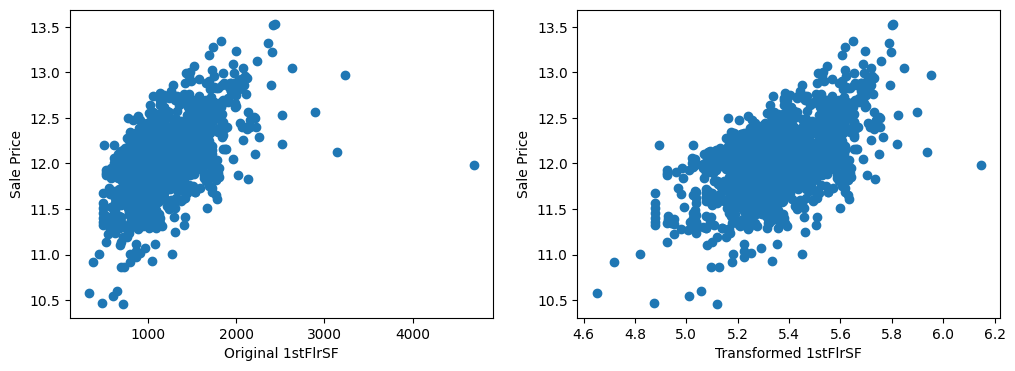

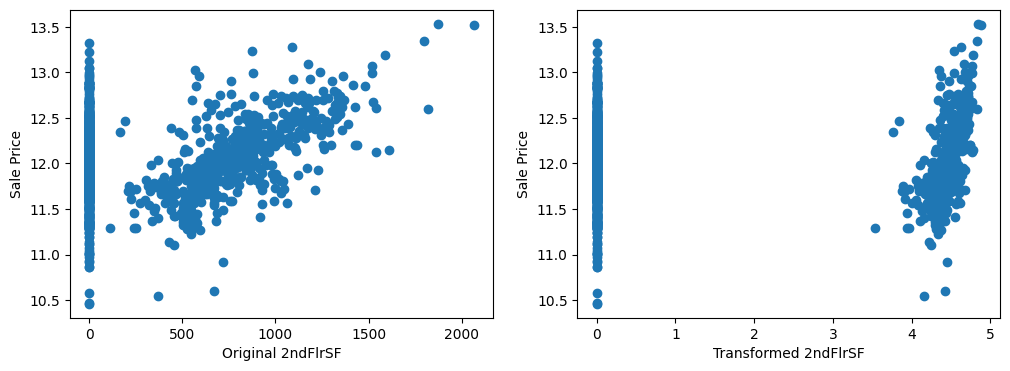

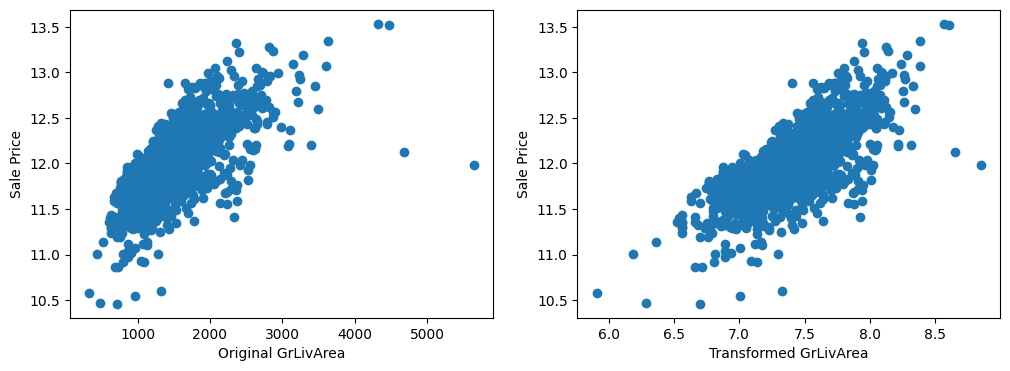

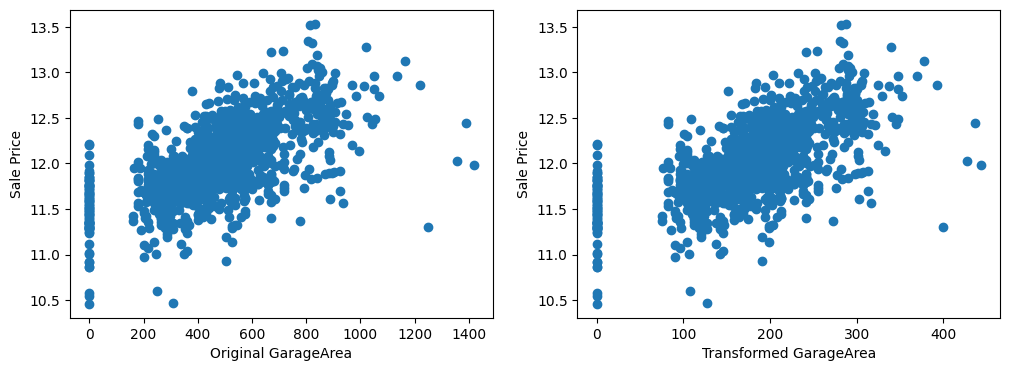

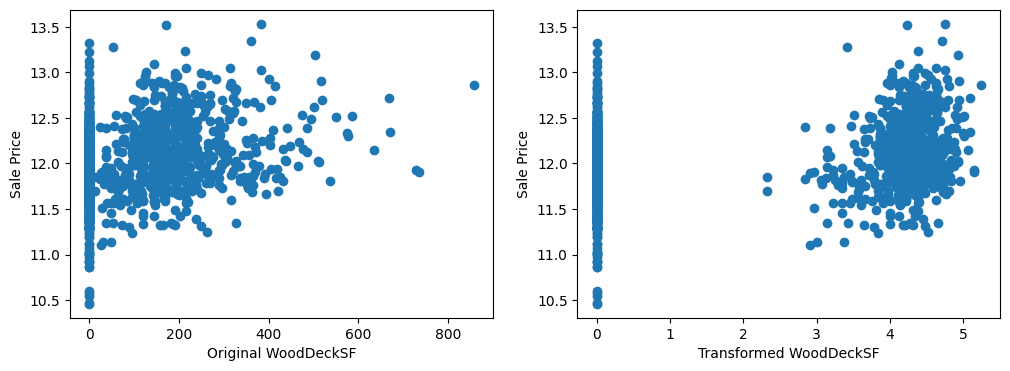

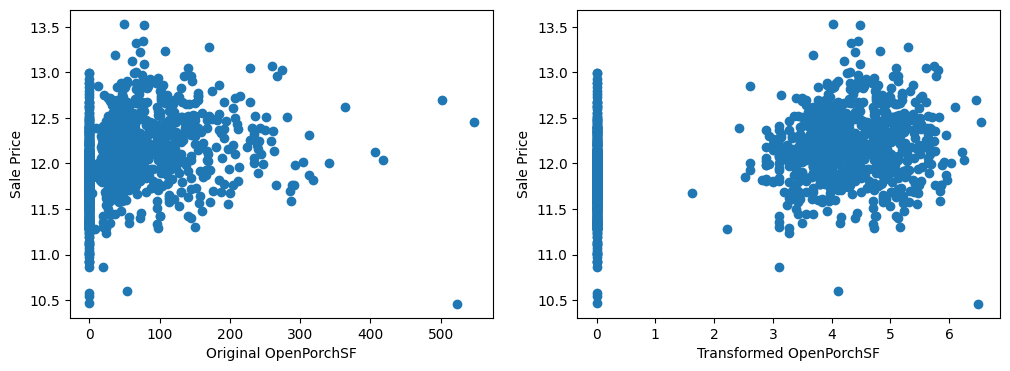

In [456]:
#transform log
for var in cont_vars:
    plt.figure(figsize=(12,4))
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

At first glance, the transformation seems to improve the relationship only for LotArea.

Let's try a different transformation now. Most of the variables have the value 0, so we can't apply a logarithmic transformation, but we can certainly do it for the following variables:

["LotFrontage", "1stFlrSF", "GrLivArea"]

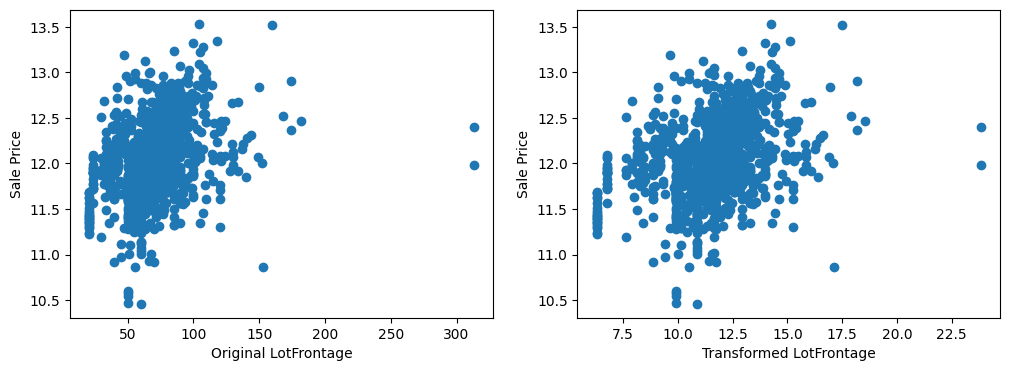

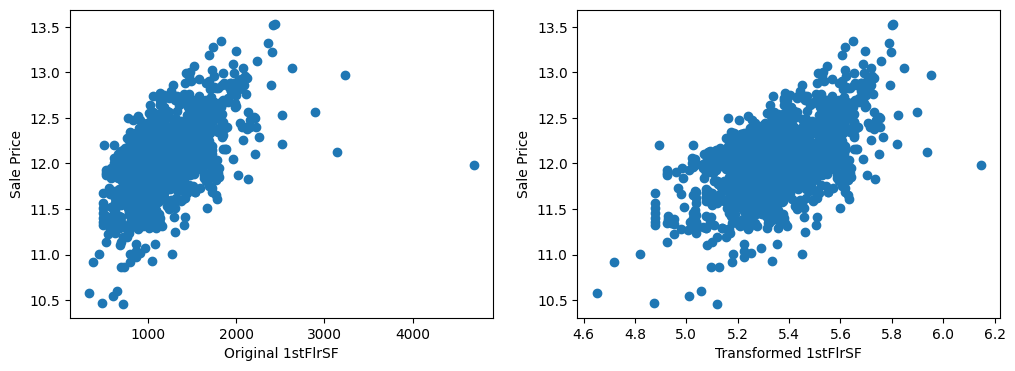

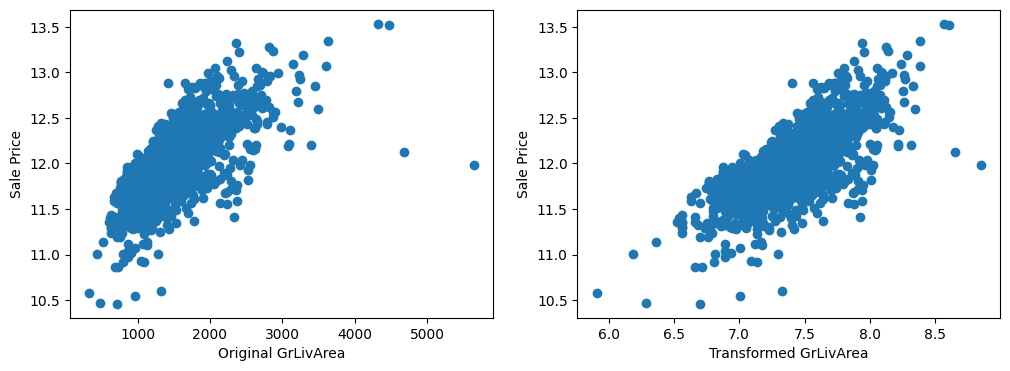

In [457]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

variable that is changed has a better distribution of values, which in turn can help make better predictions.

# Skew Variables

In [458]:
skewed

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

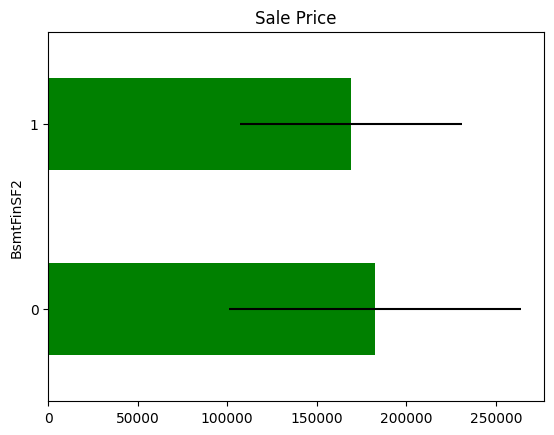

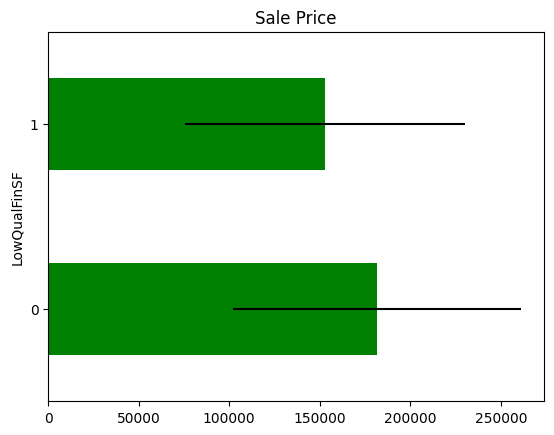

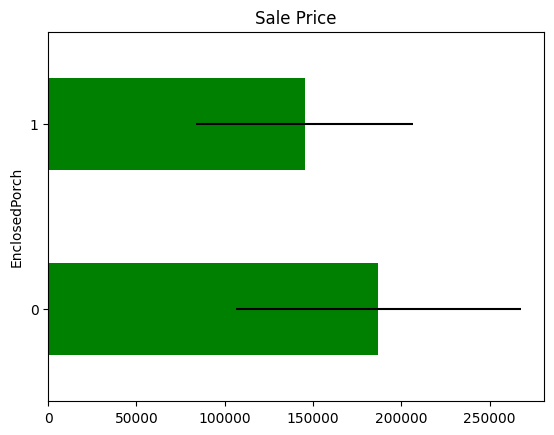

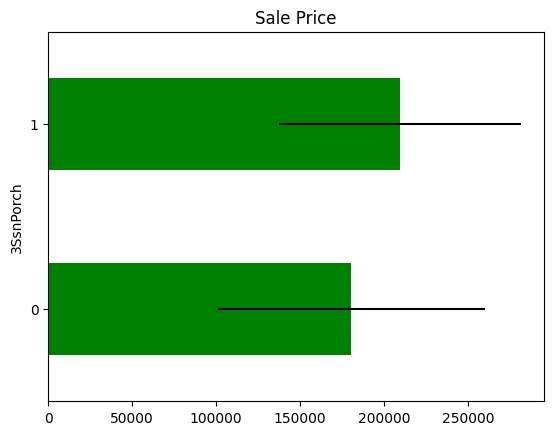

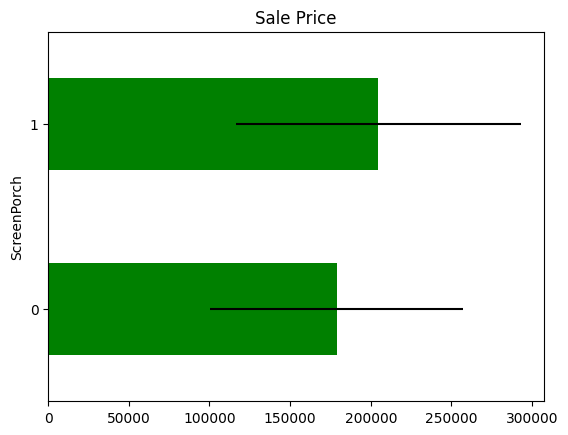

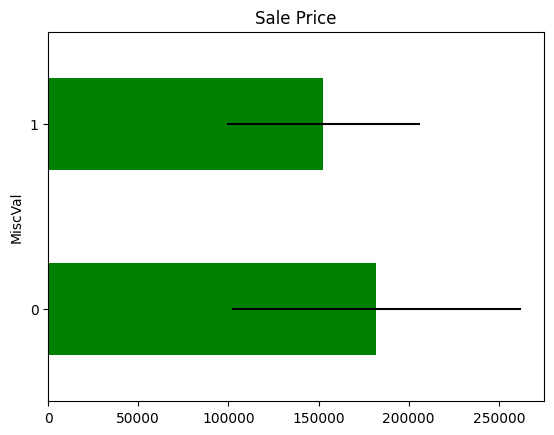

In [459]:
for var in skewed:
    tmp = data.copy()
    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])
    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')
    plt.show()

It seem there is a difference in Selling Price on the plotted value, but the confidence interval overlap, so it is likely not significant or predictive.

# Categorical Variable

## Number of labels: cardinality

In [460]:
cat_vars = data.select_dtypes(exclude=["float","int"]).columns.tolist()

cat_vars = cat_vars + ['MSSubClass'] # base on  data description , MSSubClass is categorical variable that already encoded
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  39


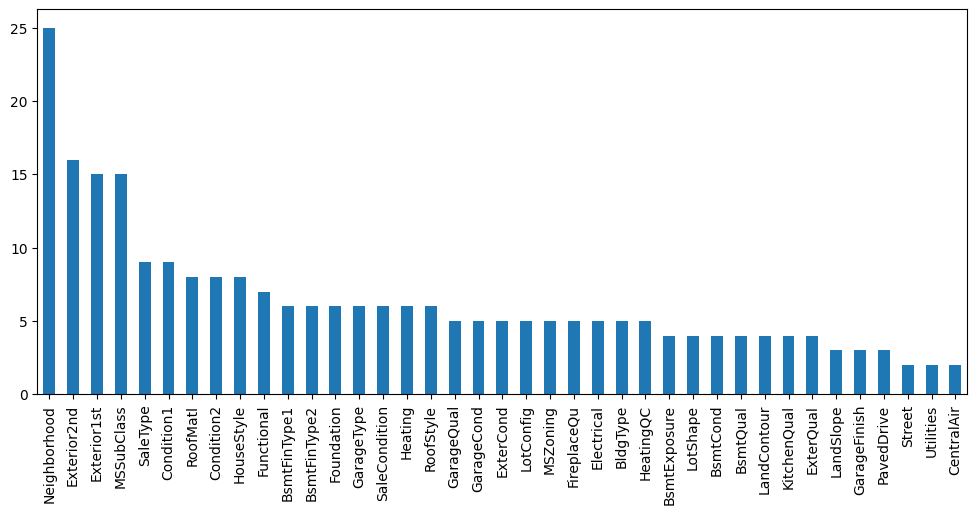

In [461]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.show()

All categorical variables show low cardinality, this means they have only a few different labels. This is good because we don't need to deal with cardinality.

## Quality Variables

There are a number of variables that refer to the quality of some aspects of the house, such as the garage, or the fence, or the kitchen. Here, a category mapping will be carried out with increasing numbers according to the quality of the place or room.

The example:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa = Fair
- Po = Bad

In [462]:
data_qual = data.copy()

In [464]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0, 'NaN':0}
qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    data_qual[var] = data_qual[var].map(qual_mappings)

In [465]:
data_qual[qual_vars].head()

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
Id                                                                     
1           4          3       4.0       3.0          5            4   
2           3          3       4.0       3.0          5            3   
3           4          3       4.0       3.0          5            4   
4           3          3       3.0       4.0          4            4   
5           4          3       4.0       3.0          5            4   

    FireplaceQu  GarageQual  GarageCond  
Id                                       
1           NaN         3.0         3.0  
2           3.0         3.0         3.0  
3           3.0         3.0         3.0  
4           4.0         3.0         3.0  
5           3.0         3.0         3.0

In [466]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data_qual[var] = data_qual[var].map(exposure_mappings)

In [467]:
data_qual[var].head()

Id
1    1.0
2    4.0
3    2.0
4    1.0
5    3.0
Name: BsmtExposure, dtype: float64

In [468]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data_qual[var] = data_qual[var].map(finish_mappings)

In [469]:
data_qual[finish_vars].head()

BsmtFinType1  BsmtFinType2
Id                            
1            6.0           1.0
2            5.0           1.0
3            6.0           1.0
4            5.0           1.0
5            6.0           1.0

In [470]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data_qual[var] = data_qual[var].map(garage_mappings)

In [471]:
data_qual[var].head()

Id
1    2.0
2    2.0
3    2.0
4    1.0
5    2.0
Name: GarageFinish, dtype: float64

In [472]:
# capture all quality variables
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish']

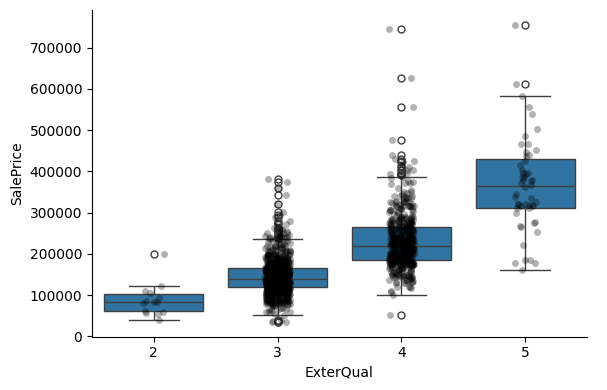

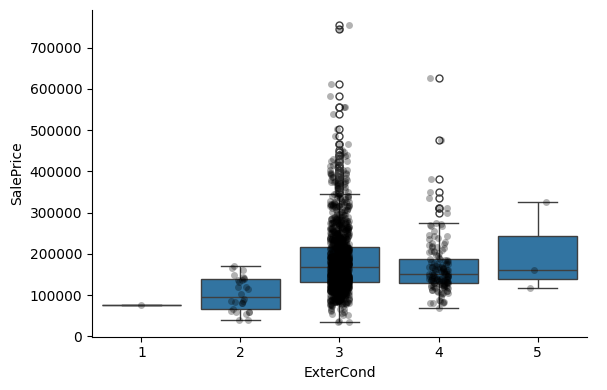

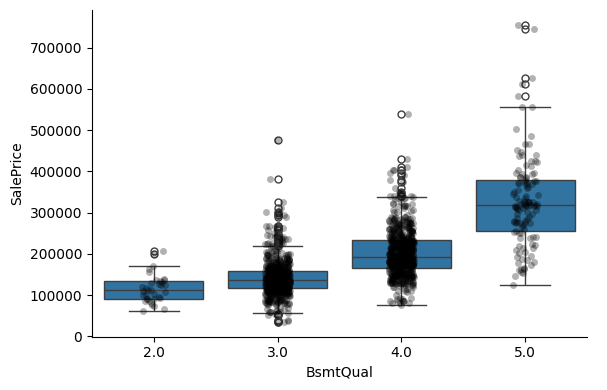

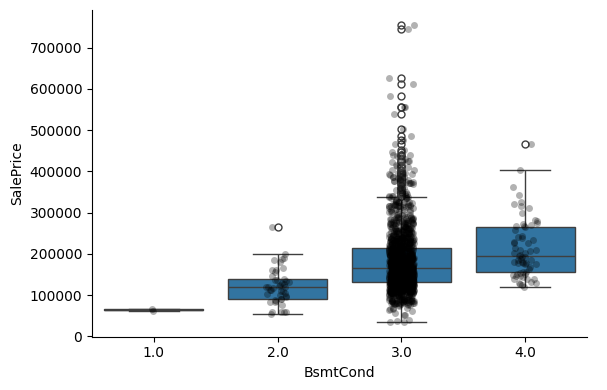

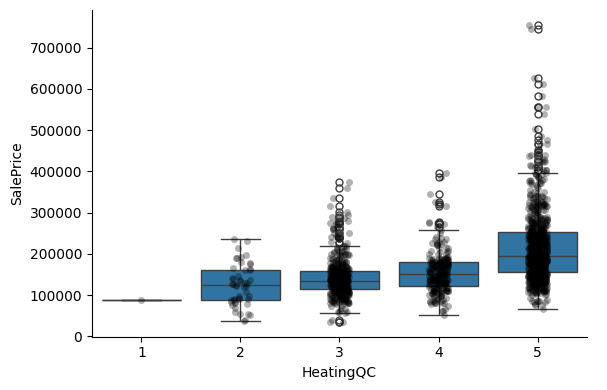

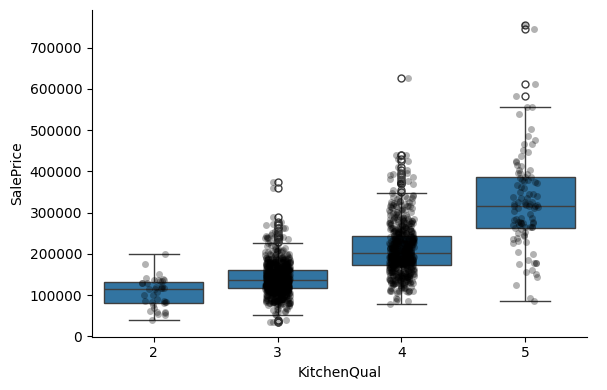

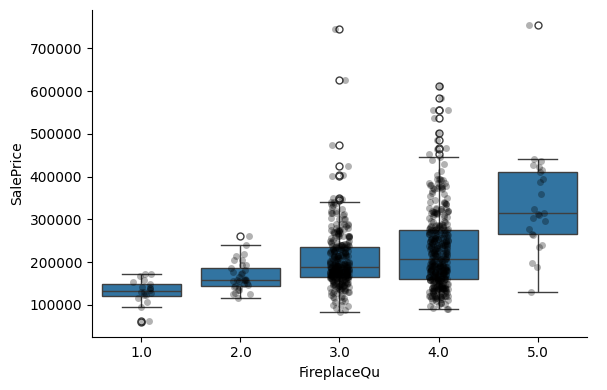

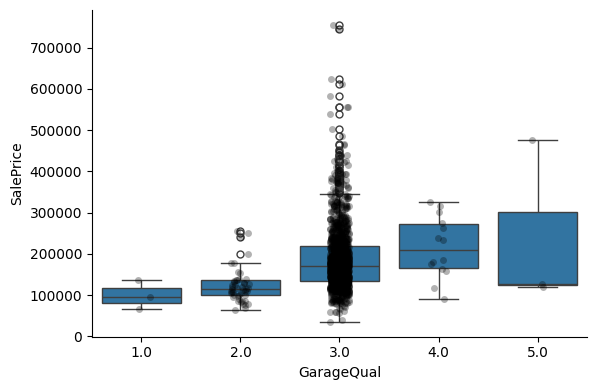

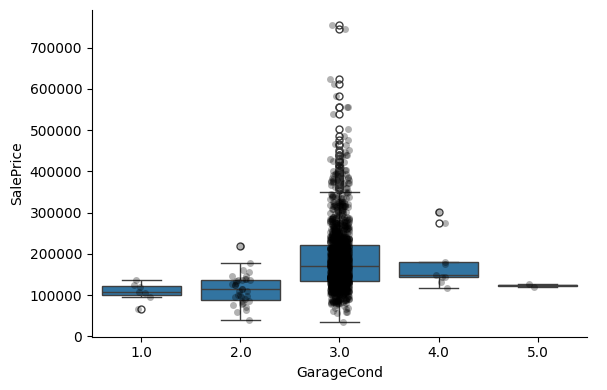

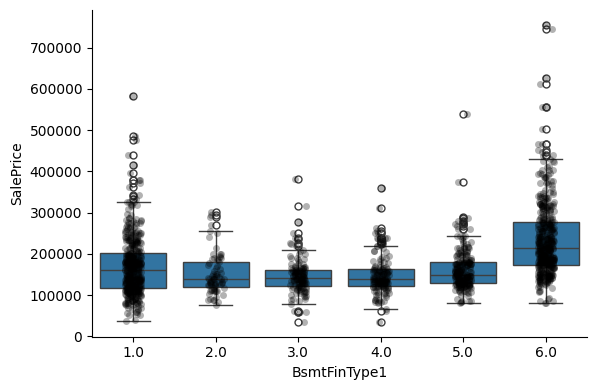

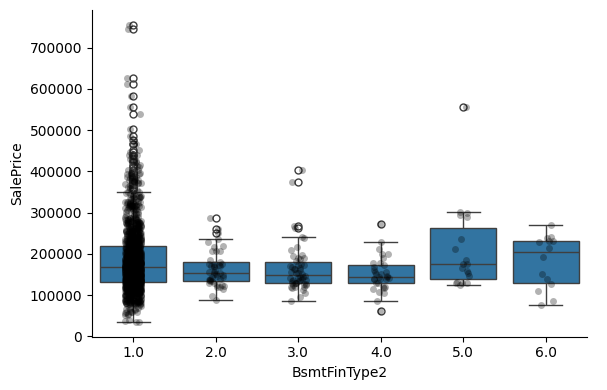

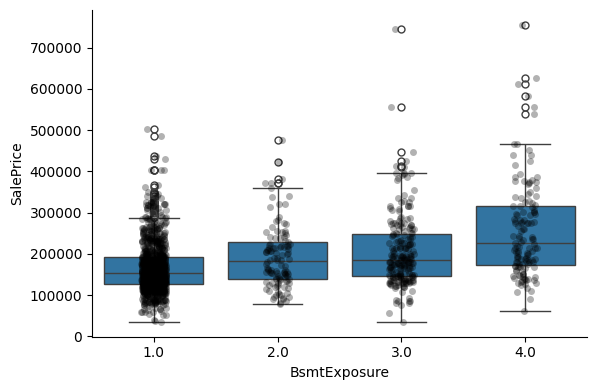

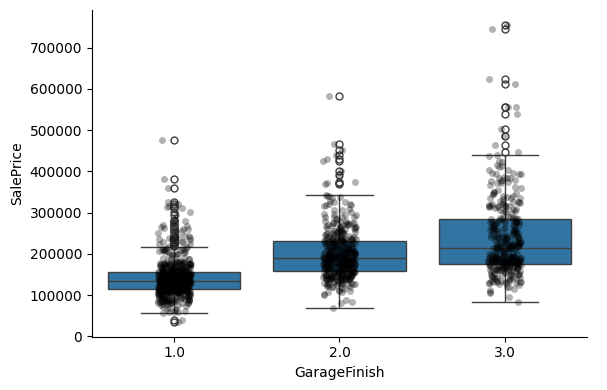

In [473]:
for var in qual_vars:
    sns.catplot(x=var, y='SalePrice', data=data_qual, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data_qual, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most attributes, the increase in house prices with their variable values is quite clear.

## Rare labels

In [474]:
cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

26

In [475]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

'''print categories that are present in less than 1 % of the observations'''

for var in cat_others:
    print(analyse_rare_labels(data_qual, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat       0.008904
Gambrel    0.007534
Mansard  

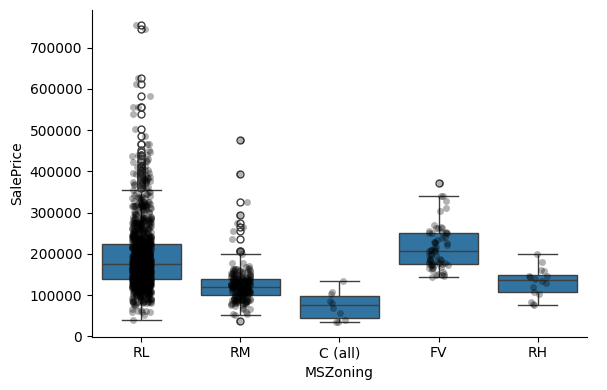

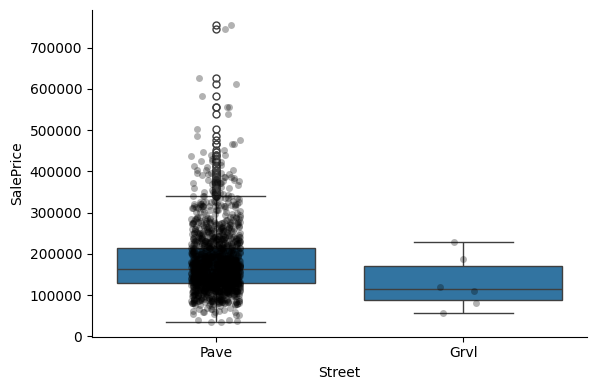

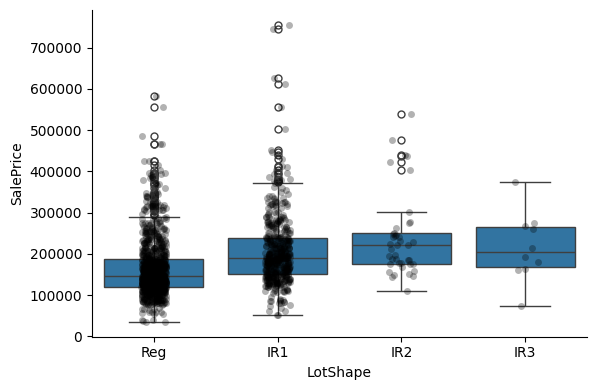

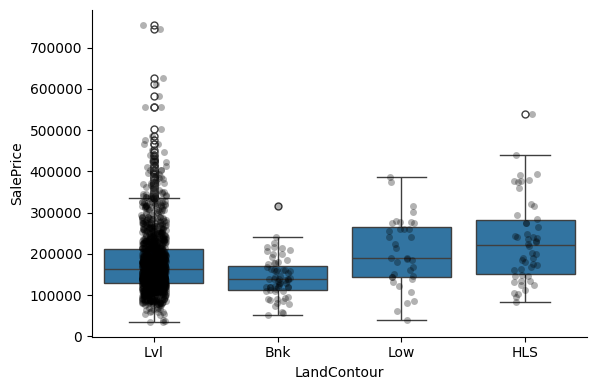

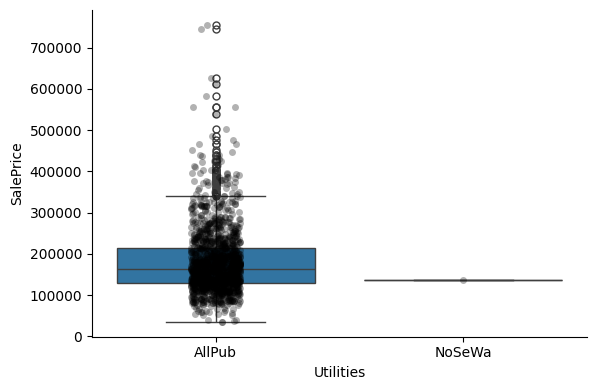

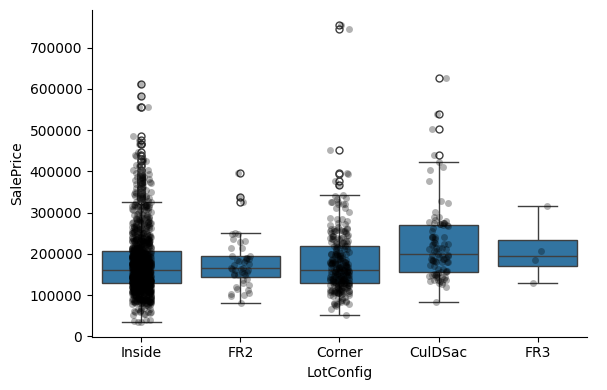

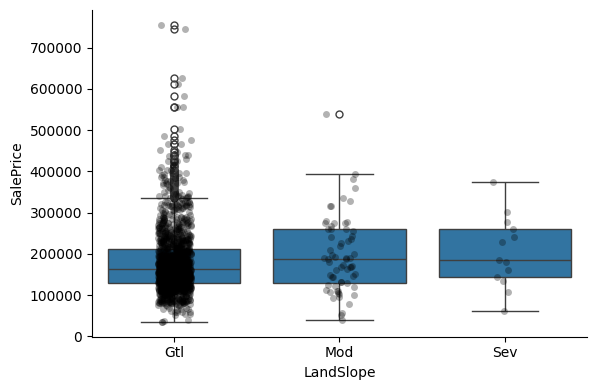

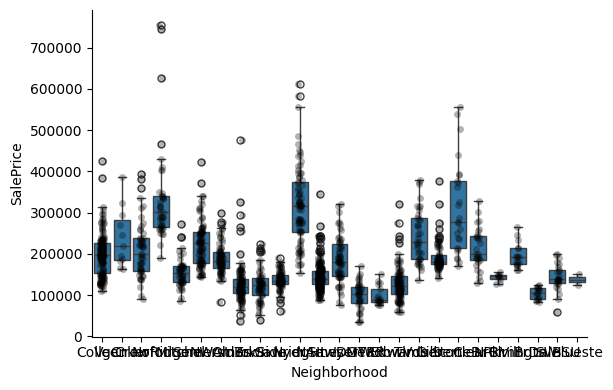

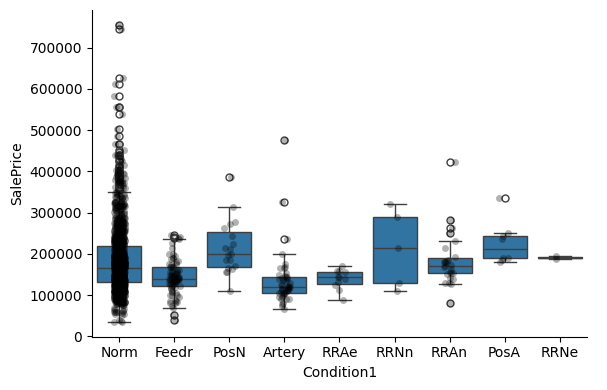

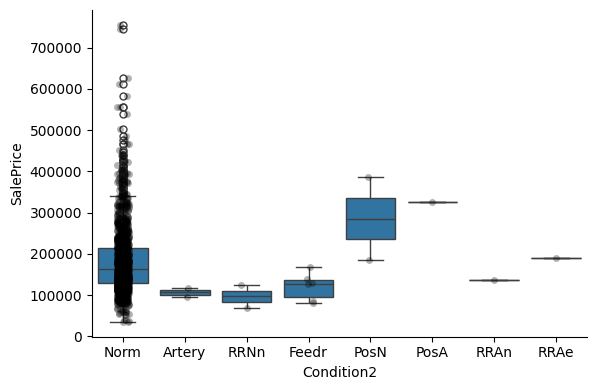

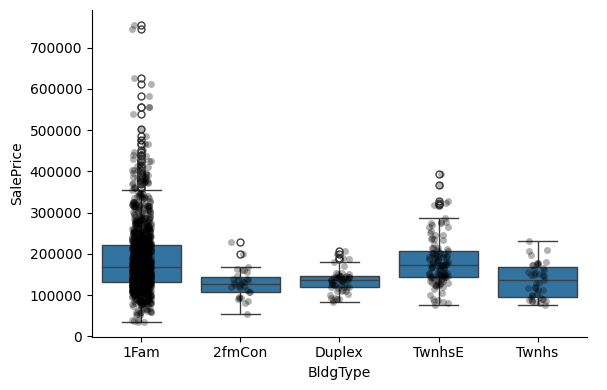

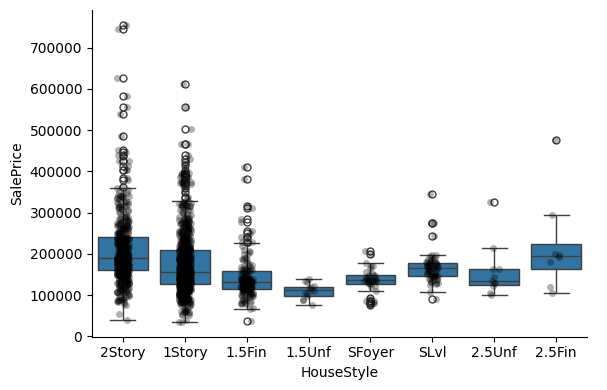

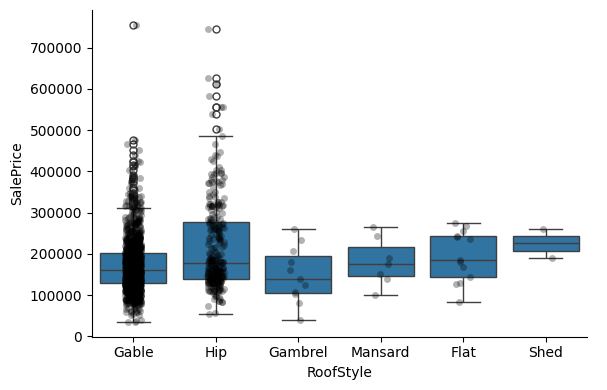

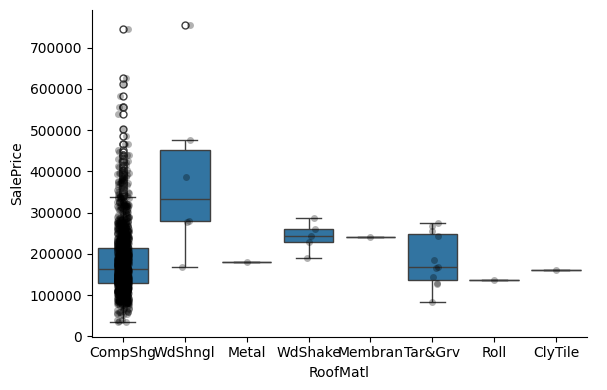

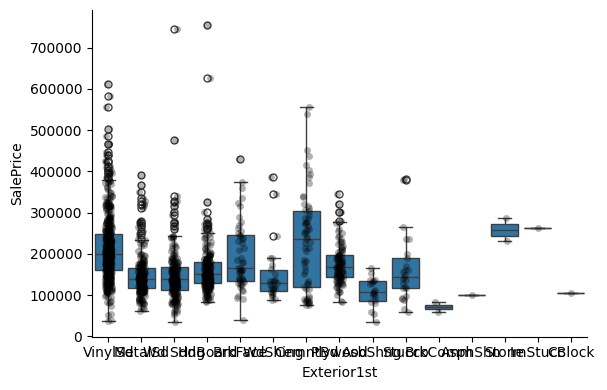

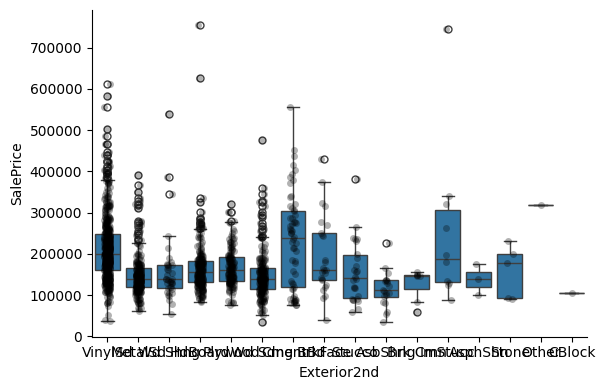

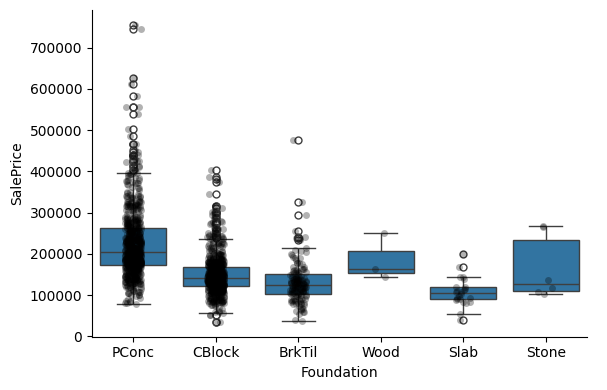

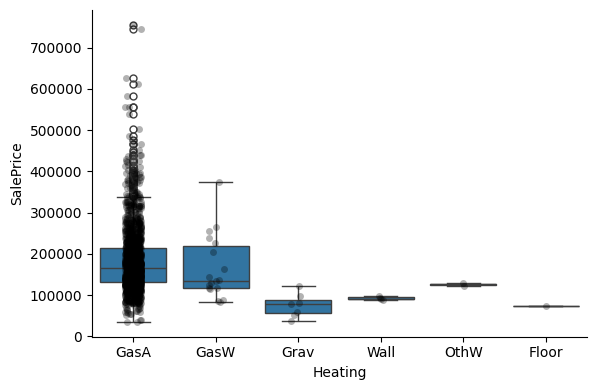

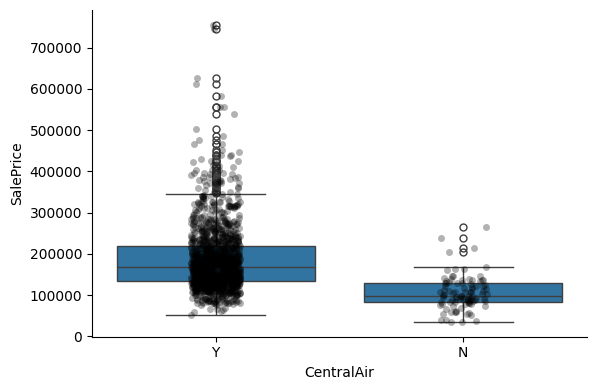

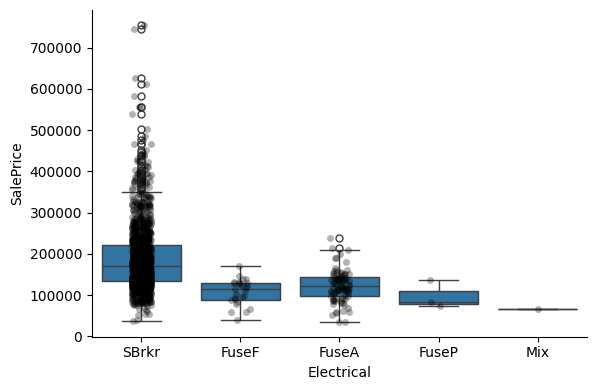

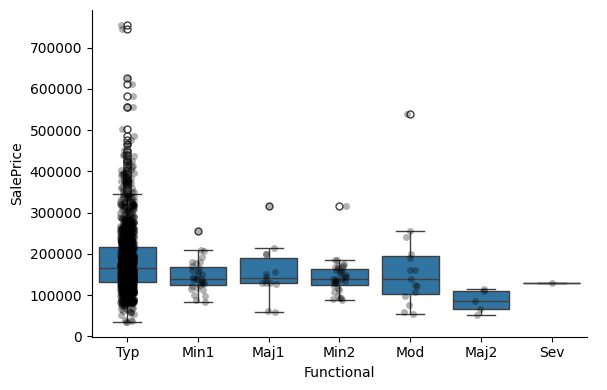

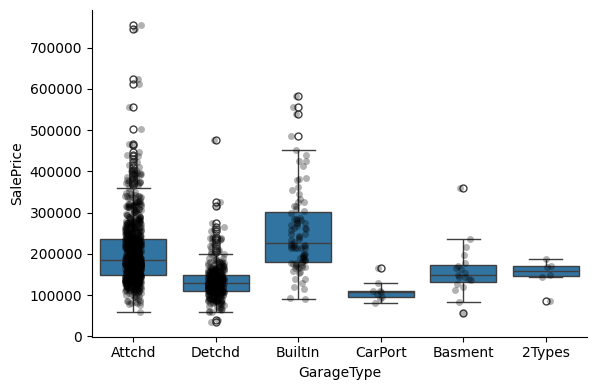

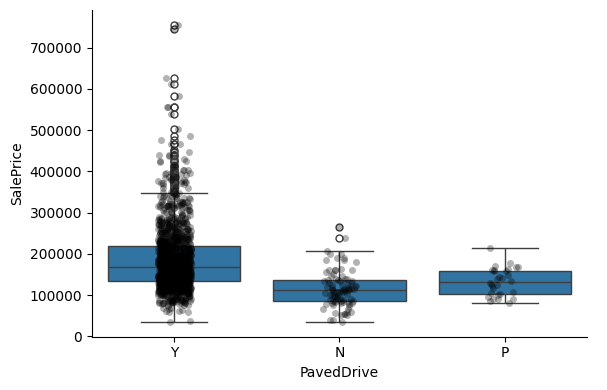

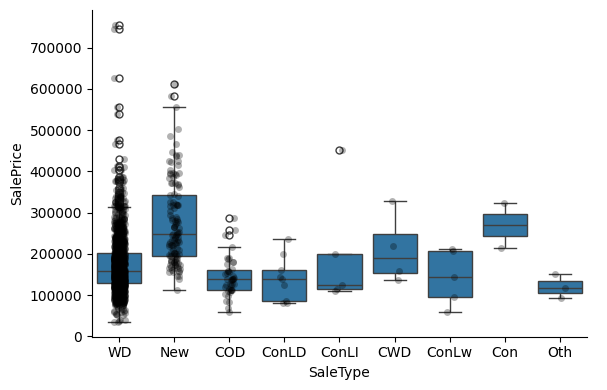

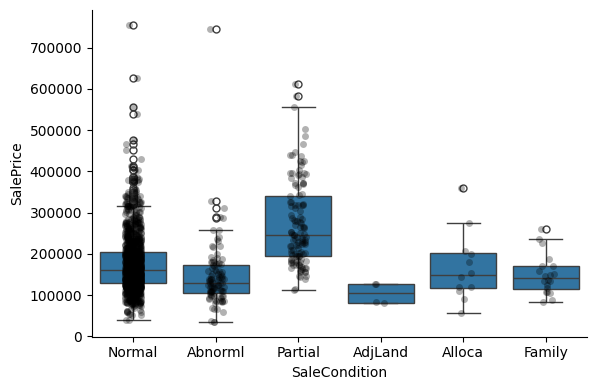

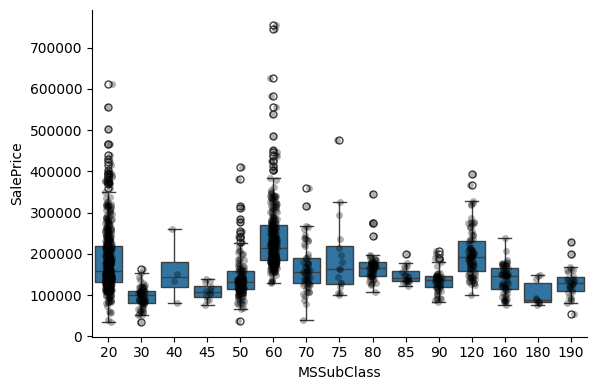

In [476]:
for var in cat_others:
    sns.catplot(x=var, y='SalePrice', data=data_qual, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data_qual, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Obviously, categories provide information about SalePrice, as different categories show different average sale prices.

# Preprocessing

In [477]:
cat_vars_with_na = [
    var for var in cat_vars
    if data_qual[var].isnull().sum() > 0
]

cat_vars_with_na

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [478]:
# variables to impute with the string missing
with_string_missing = [
    var for var in cat_vars_with_na if data[var].isnull().mean() > 0.1]

# variables to impute with the most frequent category
with_frequent_category = [
    var for var in cat_vars_with_na if data[var].isnull().mean() < 0.1]

In [480]:
with_string_missing

['FireplaceQu']

In [481]:
with_frequent_category

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [482]:
data_qual[with_string_missing] = data_qual[with_string_missing].fillna('Missing')

In [375]:
data_qual[with_string_missing]

FireplaceQu
Id              
1        Missing
2            3.0
3            3.0
4            4.0
5            3.0
...          ...
1456         3.0
1457         3.0
1458         4.0
1459     Missing
1460     Missing

[1460 rows x 1 columns]

In [483]:
for var in with_frequent_category:
    # there can be more than 1 mode in a variable
    # we take the first one with [0]    
    mode = data_qual[var].mode()[0]
    print(var, mode)
    data_qual[var].fillna(mode, inplace=True);

BsmtQual 3.0
BsmtCond 3.0
BsmtExposure 1.0
BsmtFinType1 1.0
BsmtFinType2 1.0
Electrical SBrkr
GarageType Attchd
GarageFinish 1.0
GarageQual 3.0
GarageCond 3.0


C:\Users\Deva\AppData\Local\Temp\ipykernel_23896\2625839670.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_qual[var].fillna(mode, inplace=True);


In [484]:
# check 
data_qual[cat_vars_with_na].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### Numeric Variables

To impute missing values ​​in a numeric variable, we will:

- add a missing binary indicator variable
- then replace the missing values ​​in the original variable with the mean

In [485]:
num_vars = [
    var for var in data_qual.columns if var not in cat_vars and var != 'SalePrice'
]

len(num_vars)

35

In [486]:
vars_with_na = [
    var for var in num_vars if data_qual[var].isnull().sum() > 0
]

# print percentage of missing values per variable
data_qual[vars_with_na].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [487]:
for var in vars_with_na:
    mean_val = data_qual[var].mean()
    print(var, mean_val)
    data_qual[var + '_na'] = np.where(data_qual[var].isnull(), 1, 0)
    data_qual[var].fillna(mean_val, inplace=True)

# check that we have no more missing values in the engineered variables
data_qual[vars_with_na].isnull().sum()

LotFrontage 70.04995836802665
MasVnrArea 103.68526170798899
GarageYrBlt 1978.5061638868744


C:\Users\Deva\AppData\Local\Temp\ipykernel_23896\1646109676.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_qual[var].fillna(mean_val, inplace=True)
C:\Users\Deva\AppData\Local\Temp\ipykernel_23896\1646109676.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [488]:
#check
[var for var in vars_with_na if data_qual[var].isnull().sum() > 0]

[]

## Temporal variables

### Capture elapsed time

In [489]:
def elapsed_years(df, var):
    df[var] = df['YrSold'] - df[var]
    return df

In [490]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    data_qual = elapsed_years(data_qual, var)

In [491]:
# now we drop YrSold
data_qual.drop(['YrSold'], axis=1, inplace=True)

In [492]:
data_qual.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   
2           20       RL         80.0     9600   Pave      Reg         Lvl   
3           60       RL         68.0    11250   Pave      IR1         Lvl   
4           70       RL         60.0     9550   Pave      IR1         Lvl   
5           60       RL         84.0    14260   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                             
1     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2     AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
3     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4     AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
5     AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                           
1      2Story            7            5          5             5     Gable   
2      1Story            6            8         31            31     Gable   
3      2Story            7            5          7             6     Gable   
4      2Story            7            5         91            36     Gable   
5      2Story            8            5          8             8     Gable   

   RoofMatl Exterior1st Exterior2nd  MasVnrArea  ExterQual  ExterCond  \
Id                                                                      
1   CompShg     VinylSd     VinylSd       196.0          4          3   
2   CompShg     MetalSd     MetalSd         0.0          3          3   
3   CompShg     VinylSd     VinylSd       162.0          4          3   
4   CompShg     Wd Sdng     Wd Shng         0.0          3          3   
5   CompShg     VinylSd     VinylSd       350.0          4          3   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
Id                                                                          
1       PConc       4.0       3.0           1.0           6.0         706   
2      CBlock       4.0       3.0           4.0           5.0         978   
3       PConc       4.0       3.0           2.0           6.0         486   
4      BrkTil       3.0       4.0           1.0           5.0         216   
5       PConc       4.0       3.0           3.0           6.0         655   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
Id                                                                        
1            1.0           0        150          856    GasA          5   
2            1.0           0        284         1262    GasA          5   
3            1.0           0        434          920    GasA          5   
4            1.0           0        540          756    GasA          4   
5            1.0           0        490         1145    GasA          5   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Id                                                                      
1           Y      SBrkr       856       854             0       1710   
2           Y      SBrkr      1262         0             0       1262   
3           Y      SBrkr       920       866             0       1786   
4           Y      SBrkr       961       756             0       1717   
5           Y      SBrkr      1145      1053             0       2198   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1              1             0         2         1             3   
2              0             1         2         0            

## Transform Numeric Variables

### Log Transform

In [493]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    data_qual[var] = np.log(data_qual[var])

### Yeo-Johnson transformation

apply the Yeo-Johnson transformation to LotArea.

In [494]:
# the yeo-johnson transformation learns the best exponent to transform the variable
# it needs to learn it from the train set: 
data_qual['LotArea'], param = stats.yeojohnson(data_qual['LotArea'])

print(param)

0.03081855115113282


### Binarizazi skeww variables

There are some variables that over skeww

In [495]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in skewed:
    # map the variable values into 0 and 1
    data_qual[var] = np.where(data_qual[var]==0, 0, 1)

In [496]:
data_qual.head()

MSSubClass MSZoning  LotFrontage    LotArea Street LotShape LandContour  \
Id                                                                            
1           60       RL     4.174387  10.427531   Pave      Reg         Lvl   
2           20       RL     4.382027  10.596446   Pave      Reg         Lvl   
3           60       RL     4.219508  10.807341   Pave      IR1         Lvl   
4           70       RL     4.094345  10.589520   Pave      IR1         Lvl   
5           60       RL     4.430817  11.124530   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                             
1     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2     AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
3     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4     AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
5     AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                           
1      2Story            7            5          5             5     Gable   
2      1Story            6            8         31            31     Gable   
3      2Story            7            5          7             6     Gable   
4      2Story            7            5         91            36     Gable   
5      2Story            8            5          8             8     Gable   

   RoofMatl Exterior1st Exterior2nd  MasVnrArea  ExterQual  ExterCond  \
Id                                                                      
1   CompShg     VinylSd     VinylSd       196.0          4          3   
2   CompShg     MetalSd     MetalSd         0.0          3          3   
3   CompShg     VinylSd     VinylSd       162.0          4          3   
4   CompShg     Wd Sdng     Wd Shng         0.0          3          3   
5   CompShg     VinylSd     VinylSd       350.0          4          3   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
Id                                                                          
1       PConc       4.0       3.0           1.0           6.0         706   
2      CBlock       4.0       3.0           4.0           5.0         978   
3       PConc       4.0       3.0           2.0           6.0         486   
4      BrkTil       3.0       4.0           1.0           5.0         216   
5       PConc       4.0       3.0           3.0           6.0         655   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
Id                                                                        
1            1.0           0        150          856    GasA          5   
2            1.0           0        284         1262    GasA          5   
3            1.0           0        434          920    GasA          5   
4            1.0           0        540          756    GasA          4   
5            1.0           0        490         1145    GasA          5   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Id                                                                      
1           Y      SBrkr  6.752270       854             0   7.444249   
2           Y      SBrkr  7.140453         0             0   7.140453   
3           Y      SBrkr  6.824374       866             0   7.487734   
4           Y      SBrkr  6.867974       756             0   7.448334   
5           Y      SBrkr  7.043160      1053             0   7.695303   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1              1             0         2         1             3   
2              0             1         2        

# Handle Rare Lables

In [497]:
# capture all quality variables
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish']

# capture the remaining categorical variables
# (those that we did not re-map)
cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

26

In [498]:
def find_frequent_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)[var].count() / len(df)
    return tmp[tmp > rare_perc].index


for var in cat_others:
    # find the frequent categories
    frequent_ls = find_frequent_labels(data_qual, var, 0.01)
    print(var, frequent_ls)
    print()
    # replace rare categories by the string "Rare"
    data_qual[var] = np.where(data_qual[var].isin(
        frequent_ls), data_qual[var], 'Rare')

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')

Condition2 Index(['Norm'], dtype='object', name='Condition2')

BldgType Ind

In [499]:
def replace_categories(df, var, target):
    tmp = df.copy()
    
    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    
    print(var, ordinal_label)
    print()

    # use the dictionary to replace the categorical strings by integers
    df[var] = df[var].map(ordinal_label)

In [500]:
for var in cat_others:
    replace_categories(data_qual, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood {'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'NWAmes': 11, 'Rare': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Rare': 2, 'RRAn': 3, 'Norm': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, 'TwnhsE': 3, '1Fam': 4}

HouseStyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, 'SLvl': 3, '1Story': 4, '2Story': 5}

RoofStyle {'Gable': 0, 'Rare': 1, 'Hip

In [501]:
data_qual.head()

MSSubClass  MSZoning  LotFrontage    LotArea  Street  LotShape  \
Id                                                                   
1           12         3     4.174387  10.427531       1         0   
2            9         3     4.382027  10.596446       1         0   
3           12         3     4.219508  10.807341       1         1   
4            7         3     4.094345  10.589520       1         1   
5           12         3     4.430817  11.124530       1         1   

    LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                           
1             1          1          0          0            15           4   
2             1          1          1          0            12           1   
3             1          1          0          0            15           4   
4             1          1          2          0            16           4   
5             1          1          1          0            22           4   

    Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1            1         4           5            7            5          5   
2            1         4           4            6            8         31   
3            1         4           5            7            5          7   
4            1         4           5            7            5         91   
5            1         4           5            8            5          8   

    YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
Id                                                                            
1              5          0         0            9            9       196.0   
2             31          0         0            1            2         0.0   
3              6          0         0            9            9       162.0   
4             36          0         0            2            4         0.0   
5              8          0         0            9            9       350.0   

    ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                       
1           4          3           4       4.0       3.0           1.0   
2           3          3           2       4.0       3.0           4.0   
3           4          3           4       4.0       3.0           2.0   
4           3          3           1       3.0       4.0           1.0   
5           4          3           4       4.0       3.0           3.0   

    BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                  
1            6.0         706           1.0           0        150   
2            5.0         978           1.0           0        284   
3            6.0         486           1.0           0        434   
4            5.0         216           1.0           0        540   
5            6.0         655           1.0           0        490   

    TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                      
1           856        2          5           1           3  6.752270   
2          1262        2          5           1           3  7.140453   
3           920        2          5           1           3  6.824374   
4           756        2          4           1           3  6.867974   
5          1145        2          5           1           3  7.043160   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1        854             0   7.444249             1             0         2   
2          0             0   7.140453             0             1         2   
3        866             0   7.487734    

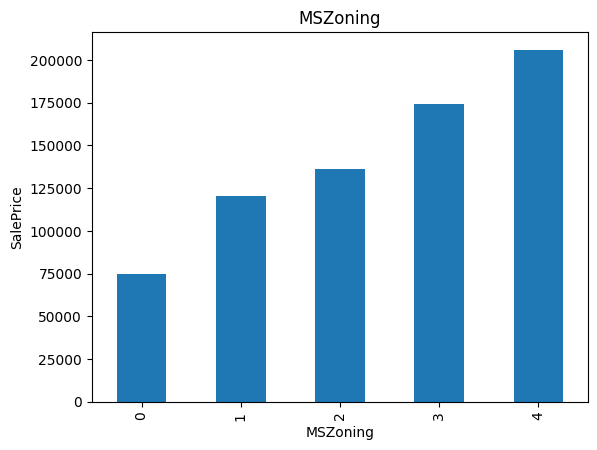

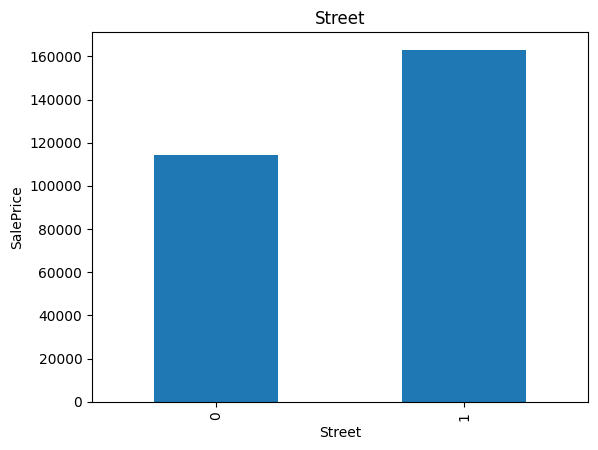

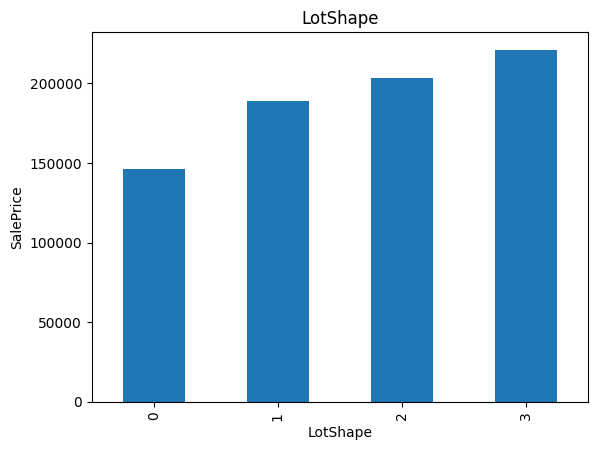

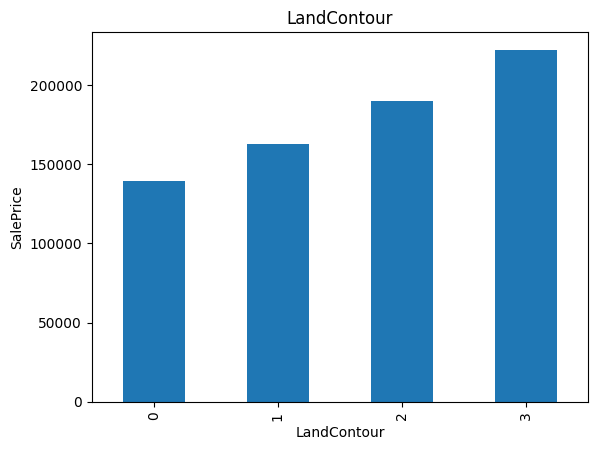

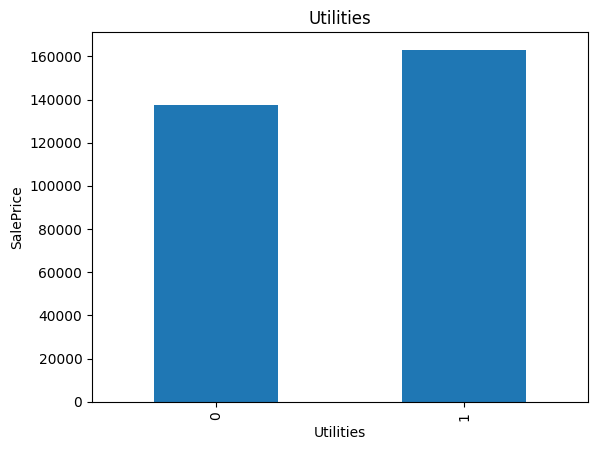

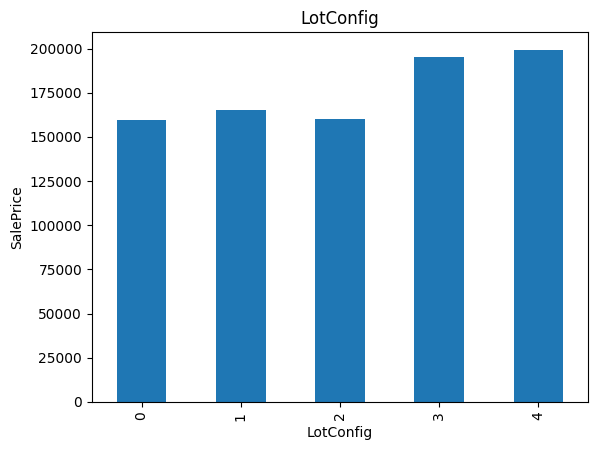

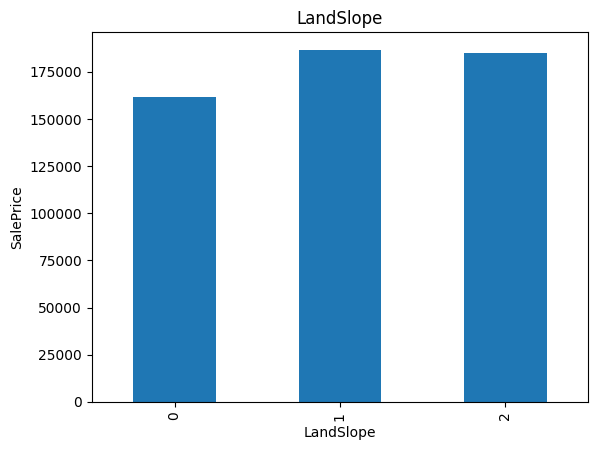

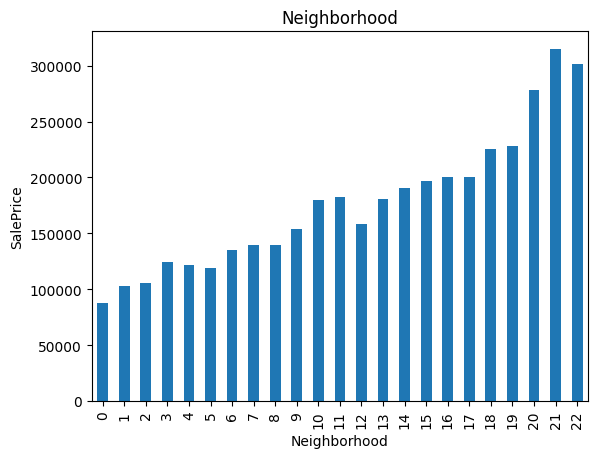

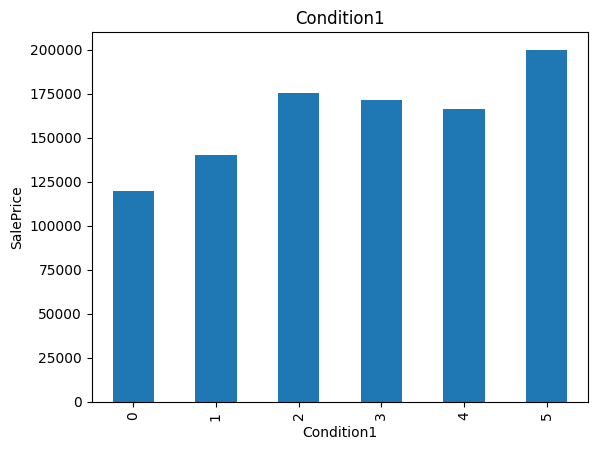

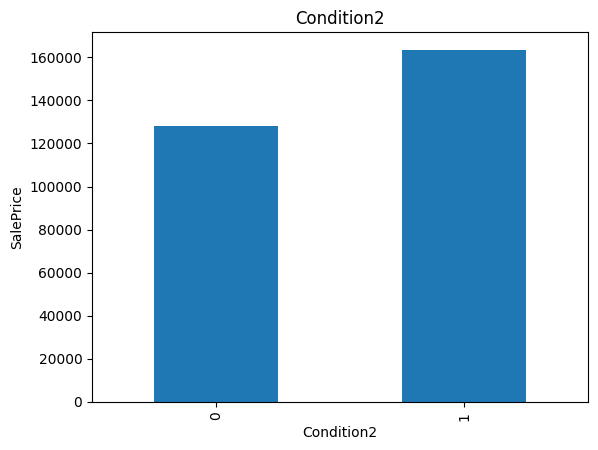

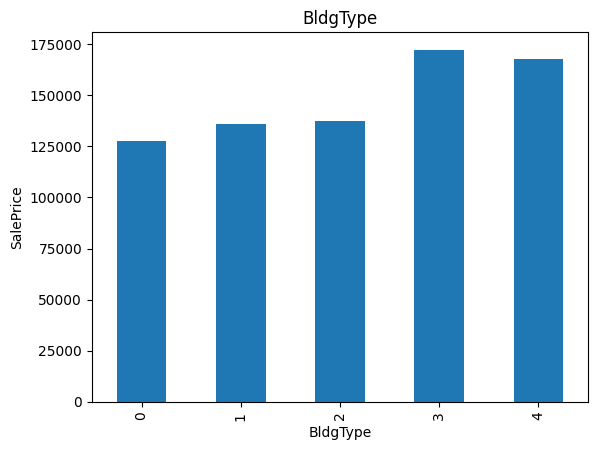

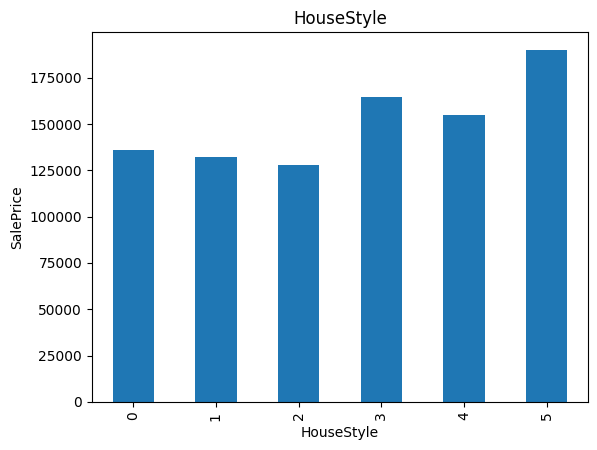

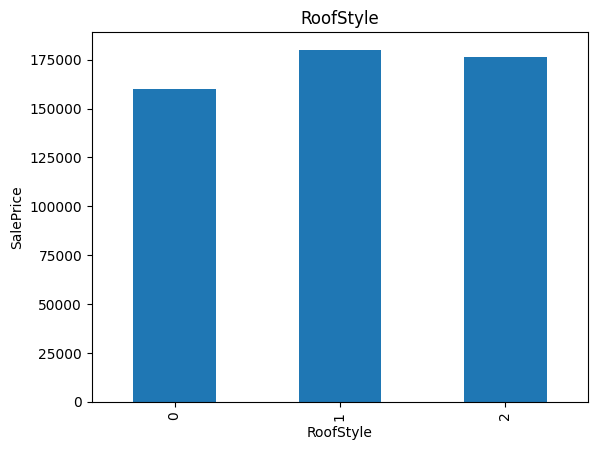

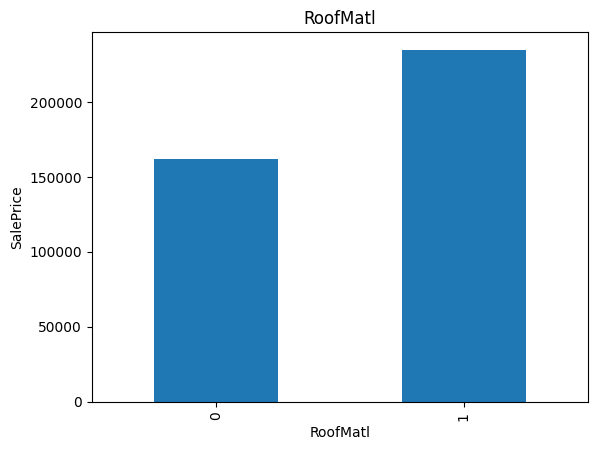

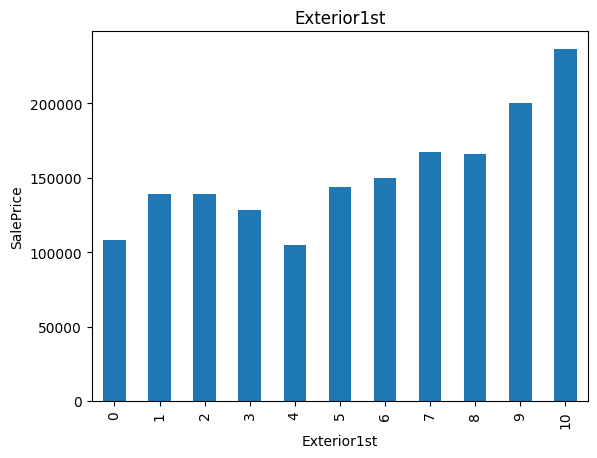

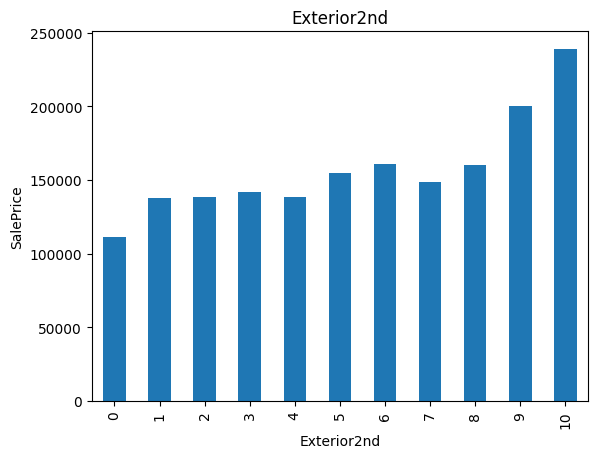

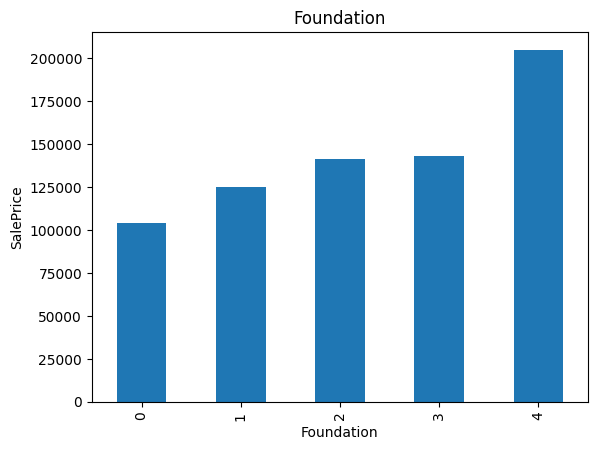

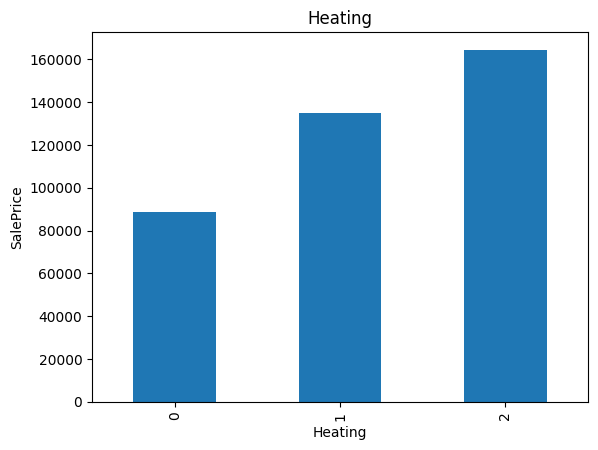

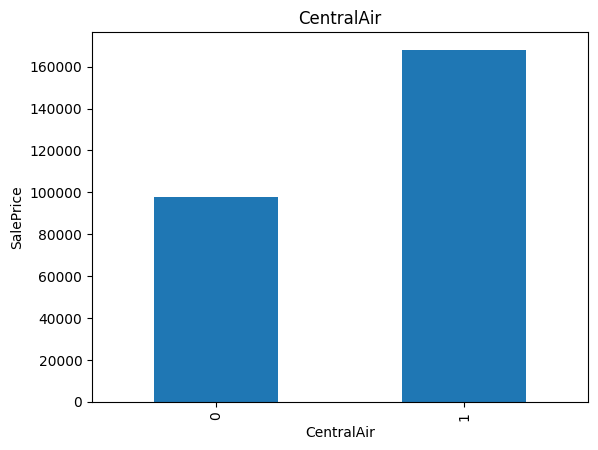

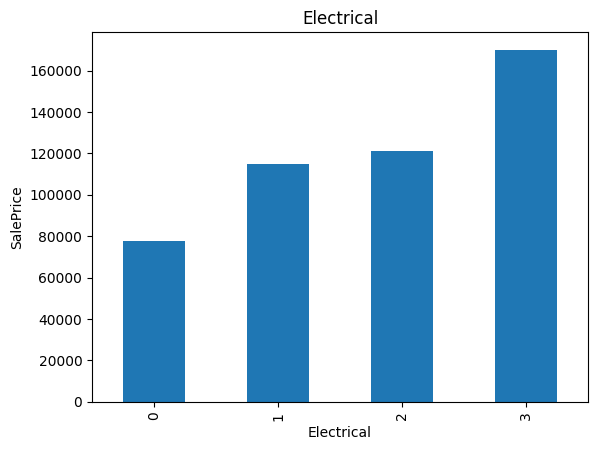

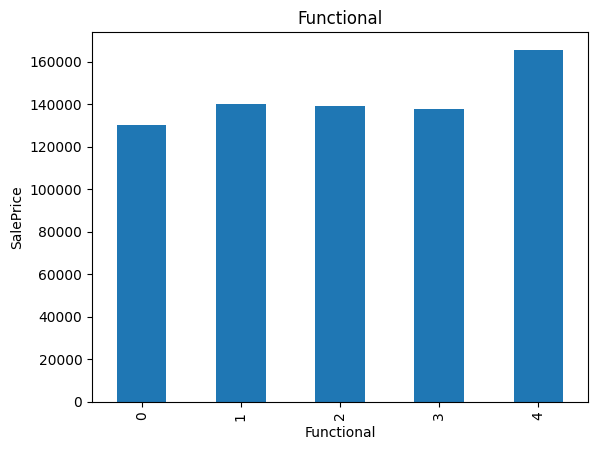

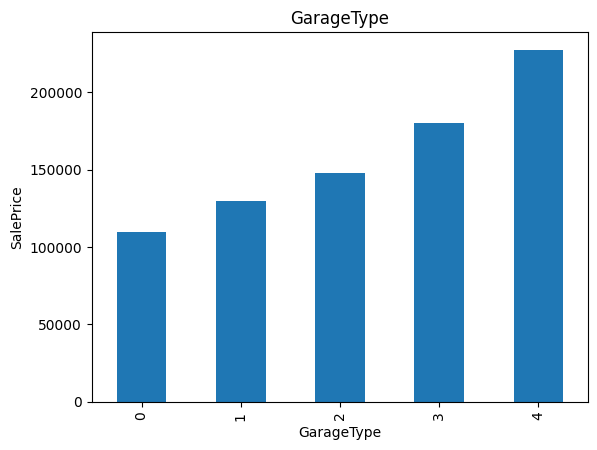

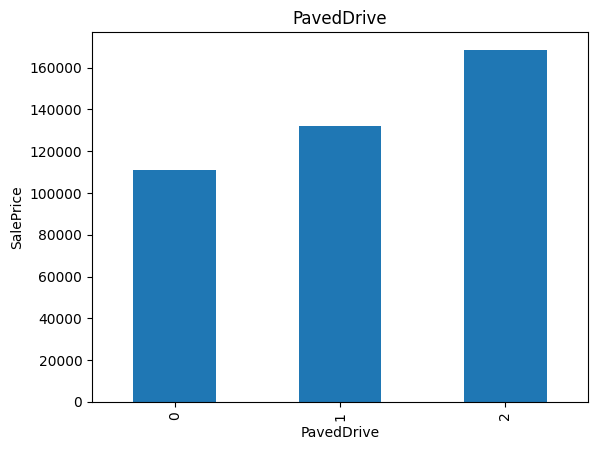

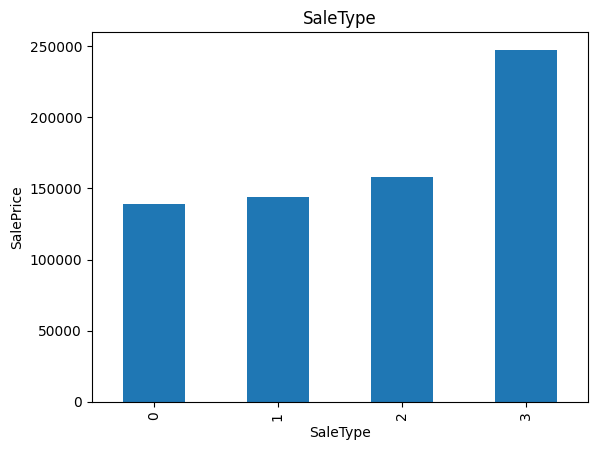

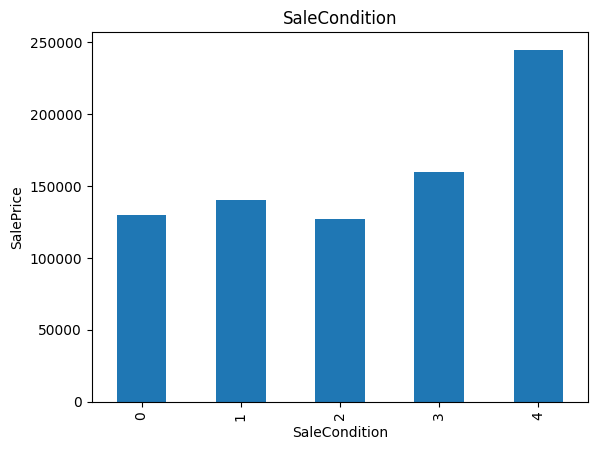

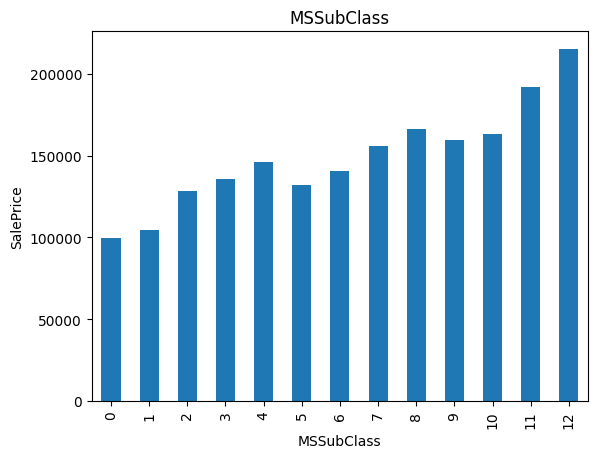

In [502]:
def analyse_vars(df,  var):
    # function plots median house sale price per encoded
    # category
    tmp = df.copy()
    tmp.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()

for var in cat_others:
    analyse_vars(data_qual,  var)

The monotonic relationship is very clear for the MSZoning and Neighborhood variables. Note that the higher the integer representing the category, the higher the average home sale price.

# Target Transformation

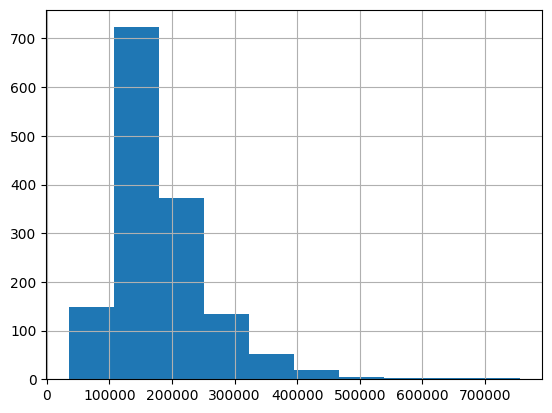

In [504]:
data_qual["SalePrice"].hist();

In [505]:
data_qual["SalePrice"] = np.log(data_qual["SalePrice"])

<Axes: >

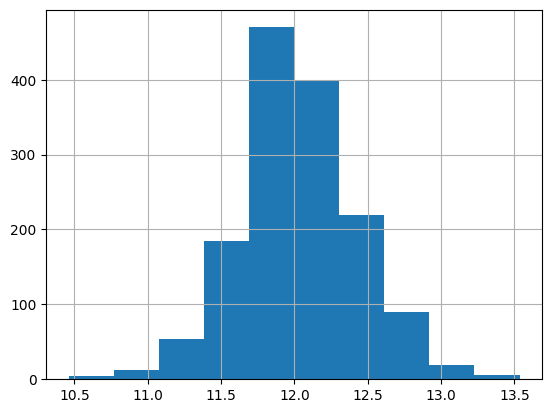

In [506]:
data_qual["SalePrice"].hist()

# Feature Scalling

In [507]:
# perform feature scaling on the numeric predictor only
data_qual.head()

MSSubClass  MSZoning  LotFrontage    LotArea  Street  LotShape  \
Id                                                                   
1           12         3     4.174387  10.427531       1         0   
2            9         3     4.382027  10.596446       1         0   
3           12         3     4.219508  10.807341       1         1   
4            7         3     4.094345  10.589520       1         1   
5           12         3     4.430817  11.124530       1         1   

    LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                           
1             1          1          0          0            15           4   
2             1          1          1          0            12           1   
3             1          1          0          0            15           4   
4             1          1          2          0            16           4   
5             1          1          1          0            22           4   

    Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1            1         4           5            7            5          5   
2            1         4           4            6            8         31   
3            1         4           5            7            5          7   
4            1         4           5            7            5         91   
5            1         4           5            8            5          8   

    YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
Id                                                                            
1              5          0         0            9            9       196.0   
2             31          0         0            1            2         0.0   
3              6          0         0            9            9       162.0   
4             36          0         0            2            4         0.0   
5              8          0         0            9            9       350.0   

    ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                       
1           4          3           4       4.0       3.0           1.0   
2           3          3           2       4.0       3.0           4.0   
3           4          3           4       4.0       3.0           2.0   
4           3          3           1       3.0       4.0           1.0   
5           4          3           4       4.0       3.0           3.0   

    BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                  
1            6.0         706           1.0           0        150   
2            5.0         978           1.0           0        284   
3            6.0         486           1.0           0        434   
4            5.0         216           1.0           0        540   
5            6.0         655           1.0           0        490   

    TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                      
1           856        2          5           1           3  6.752270   
2          1262        2          5           1           3  7.140453   
3           920        2          5           1           3  6.824374   
4           756        2          4           1           3  6.867974   
5          1145        2          5           1           3  7.043160   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1        854             0   7.444249             1             0         2   
2          0             0   7.140453             0             1         2   
3        866             0   7.487734    

In [508]:
data_qual.groupby("FireplaceQu")["SalePrice"].median()

FireplaceQu
1.0        11.786581
2.0        11.970350
3.0        12.141534
4.0        12.240232
5.0        12.657936
Missing    11.813030
Name: SalePrice, dtype: float64

In [509]:
data_qual = data_qual.drop("FireplaceQu",axis=1)

In [510]:
# Define Predictor and Target
X = data_qual.drop("SalePrice",axis=1).copy()
y = data_qual["SalePrice"].copy()

In [536]:
X.head()

MSSubClass  MSZoning  LotFrontage    LotArea  Street  LotShape  \
Id                                                                   
1           12         3     4.174387  10.427531       1         0   
2            9         3     4.382027  10.596446       1         0   
3           12         3     4.219508  10.807341       1         1   
4            7         3     4.094345  10.589520       1         1   
5           12         3     4.430817  11.124530       1         1   

    LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                           
1             1          1          0          0            15           4   
2             1          1          1          0            12           1   
3             1          1          0          0            15           4   
4             1          1          2          0            16           4   
5             1          1          1          0            22           4   

    Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1            1         4           5            7            5          5   
2            1         4           4            6            8         31   
3            1         4           5            7            5          7   
4            1         4           5            7            5         91   
5            1         4           5            8            5          8   

    YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
Id                                                                            
1              5          0         0            9            9       196.0   
2             31          0         0            1            2         0.0   
3              6          0         0            9            9       162.0   
4             36          0         0            2            4         0.0   
5              8          0         0            9            9       350.0   

    ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                       
1           4          3           4       4.0       3.0           1.0   
2           3          3           2       4.0       3.0           4.0   
3           4          3           4       4.0       3.0           2.0   
4           3          3           1       3.0       4.0           1.0   
5           4          3           4       4.0       3.0           3.0   

    BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                  
1            6.0         706           1.0           0        150   
2            5.0         978           1.0           0        284   
3            6.0         486           1.0           0        434   
4            5.0         216           1.0           0        540   
5            6.0         655           1.0           0        490   

    TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                      
1           856        2          5           1           3  6.752270   
2          1262        2          5           1           3  7.140453   
3           920        2          5           1           3  6.824374   
4           756        2          4           1           3  6.867974   
5          1145        2          5           1           3  7.043160   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1        854             0   7.444249             1             0         2   
2          0             0   7.140453             0             1         2   
3        866             0   7.487734    

In [537]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [538]:
# create scaler
scaler = MinMaxScaler()

# fit the scaler to predictor
scaler.fit(X_train) 

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [539]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
Id                                                                    
136     0.750000      0.75     0.495064  0.388016     1.0  0.000000   
1453    0.083333      0.25     0.189077  0.190772     1.0  0.000000   
763     1.000000      1.00     0.456066  0.352394     1.0  0.000000   
933     0.750000      0.75     0.513123  0.410255     1.0  0.333333   
436     1.000000      0.75     0.265271  0.392902     1.0  1.000000   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                             
136      0.333333        1.0        0.0        0.0      0.500000         0.8   
1453     0.333333        1.0        0.0        0.0      0.181818         0.8   
763      0.333333        1.0        0.0        0.0      0.818182         0.8   
933      0.333333        1.0        0.5        0.0      0.818182         0.4   
436      0.333333        1.0        1.0        0.0      0.681818         1.0   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
136          1.0      1.00         0.8     0.666667        0.625   0.279412   
1453         1.0      0.75         0.6     0.444444        0.500   0.007353   
763          1.0      1.00         1.0     0.666667        0.500   0.007353   
933          1.0      1.00         0.8     0.888889        0.500   0.007353   
436          1.0      1.00         1.0     0.666667        0.625   0.095588   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
Id                                                                              
136       0.639344        1.0       0.0          0.7          0.6    0.208999   
1453      0.032787        0.0       0.0          0.9          0.9    0.058055   
763       0.032787        0.0       0.0          0.9          0.9    0.000000   
933       0.032787        1.0       0.0          0.9          0.7    0.219158   
436       0.229508        0.0       0.0          0.9          0.9    0.000000   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                         
136    0.333333        0.5         1.0  0.333333  0.666667      0.000000   
1453   0.333333        0.5         1.0  0.666667  0.666667      1.000000   
763    0.333333        0.5         1.0  0.666667  0.666667      0.333333   
933    1.000000        0.5         1.0  1.000000  1.000000      0.000000   
436    0.666667        0.5         1.0  0.666667  0.666667      0.666667   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                    
136            0.0    0.000000           0.0         0.0   0.558219   
1453           1.0    0.096917           0.0         0.0   0.000000   
763            1.0    0.004252           0.0         0.0   0.313356   
933            0.0    0.000000           0.0         0.0   0.815497   
436            1.0    0.068214           0.8         1.0   0.029966   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                        
136      0.213421      1.0       0.75         1.0         1.0  0.611775   
1453     0.089525      1.0       0.75         1.0         1.0  0.441306   
763      0.123732      1.0       1.00         1.0         1.0  0.313126   
933      0.311784      1.0       1.00         1.0         1.0  0.658889   
436      0.130769      1.0       1.00         1.0         1.0  0.343112   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                              
136   0.000000           0.0   0.571872      0.000000           0.0  0.666667   
1453  0.000000           

In [540]:
# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=42))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=42))

In [541]:
sel_.get_support().sum()

np.int64(37)

In [542]:
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 75
selected features: 37
features with coefficients shrank to zero: 38


In [543]:
selected_feats

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch',
       'SaleCondition', 'LotFrontage_na', 'GarageYrBlt_na'],
      dtype='object')

In [544]:
X_train = X_train[selected_feats]
X_test = X_test[selected_feats]

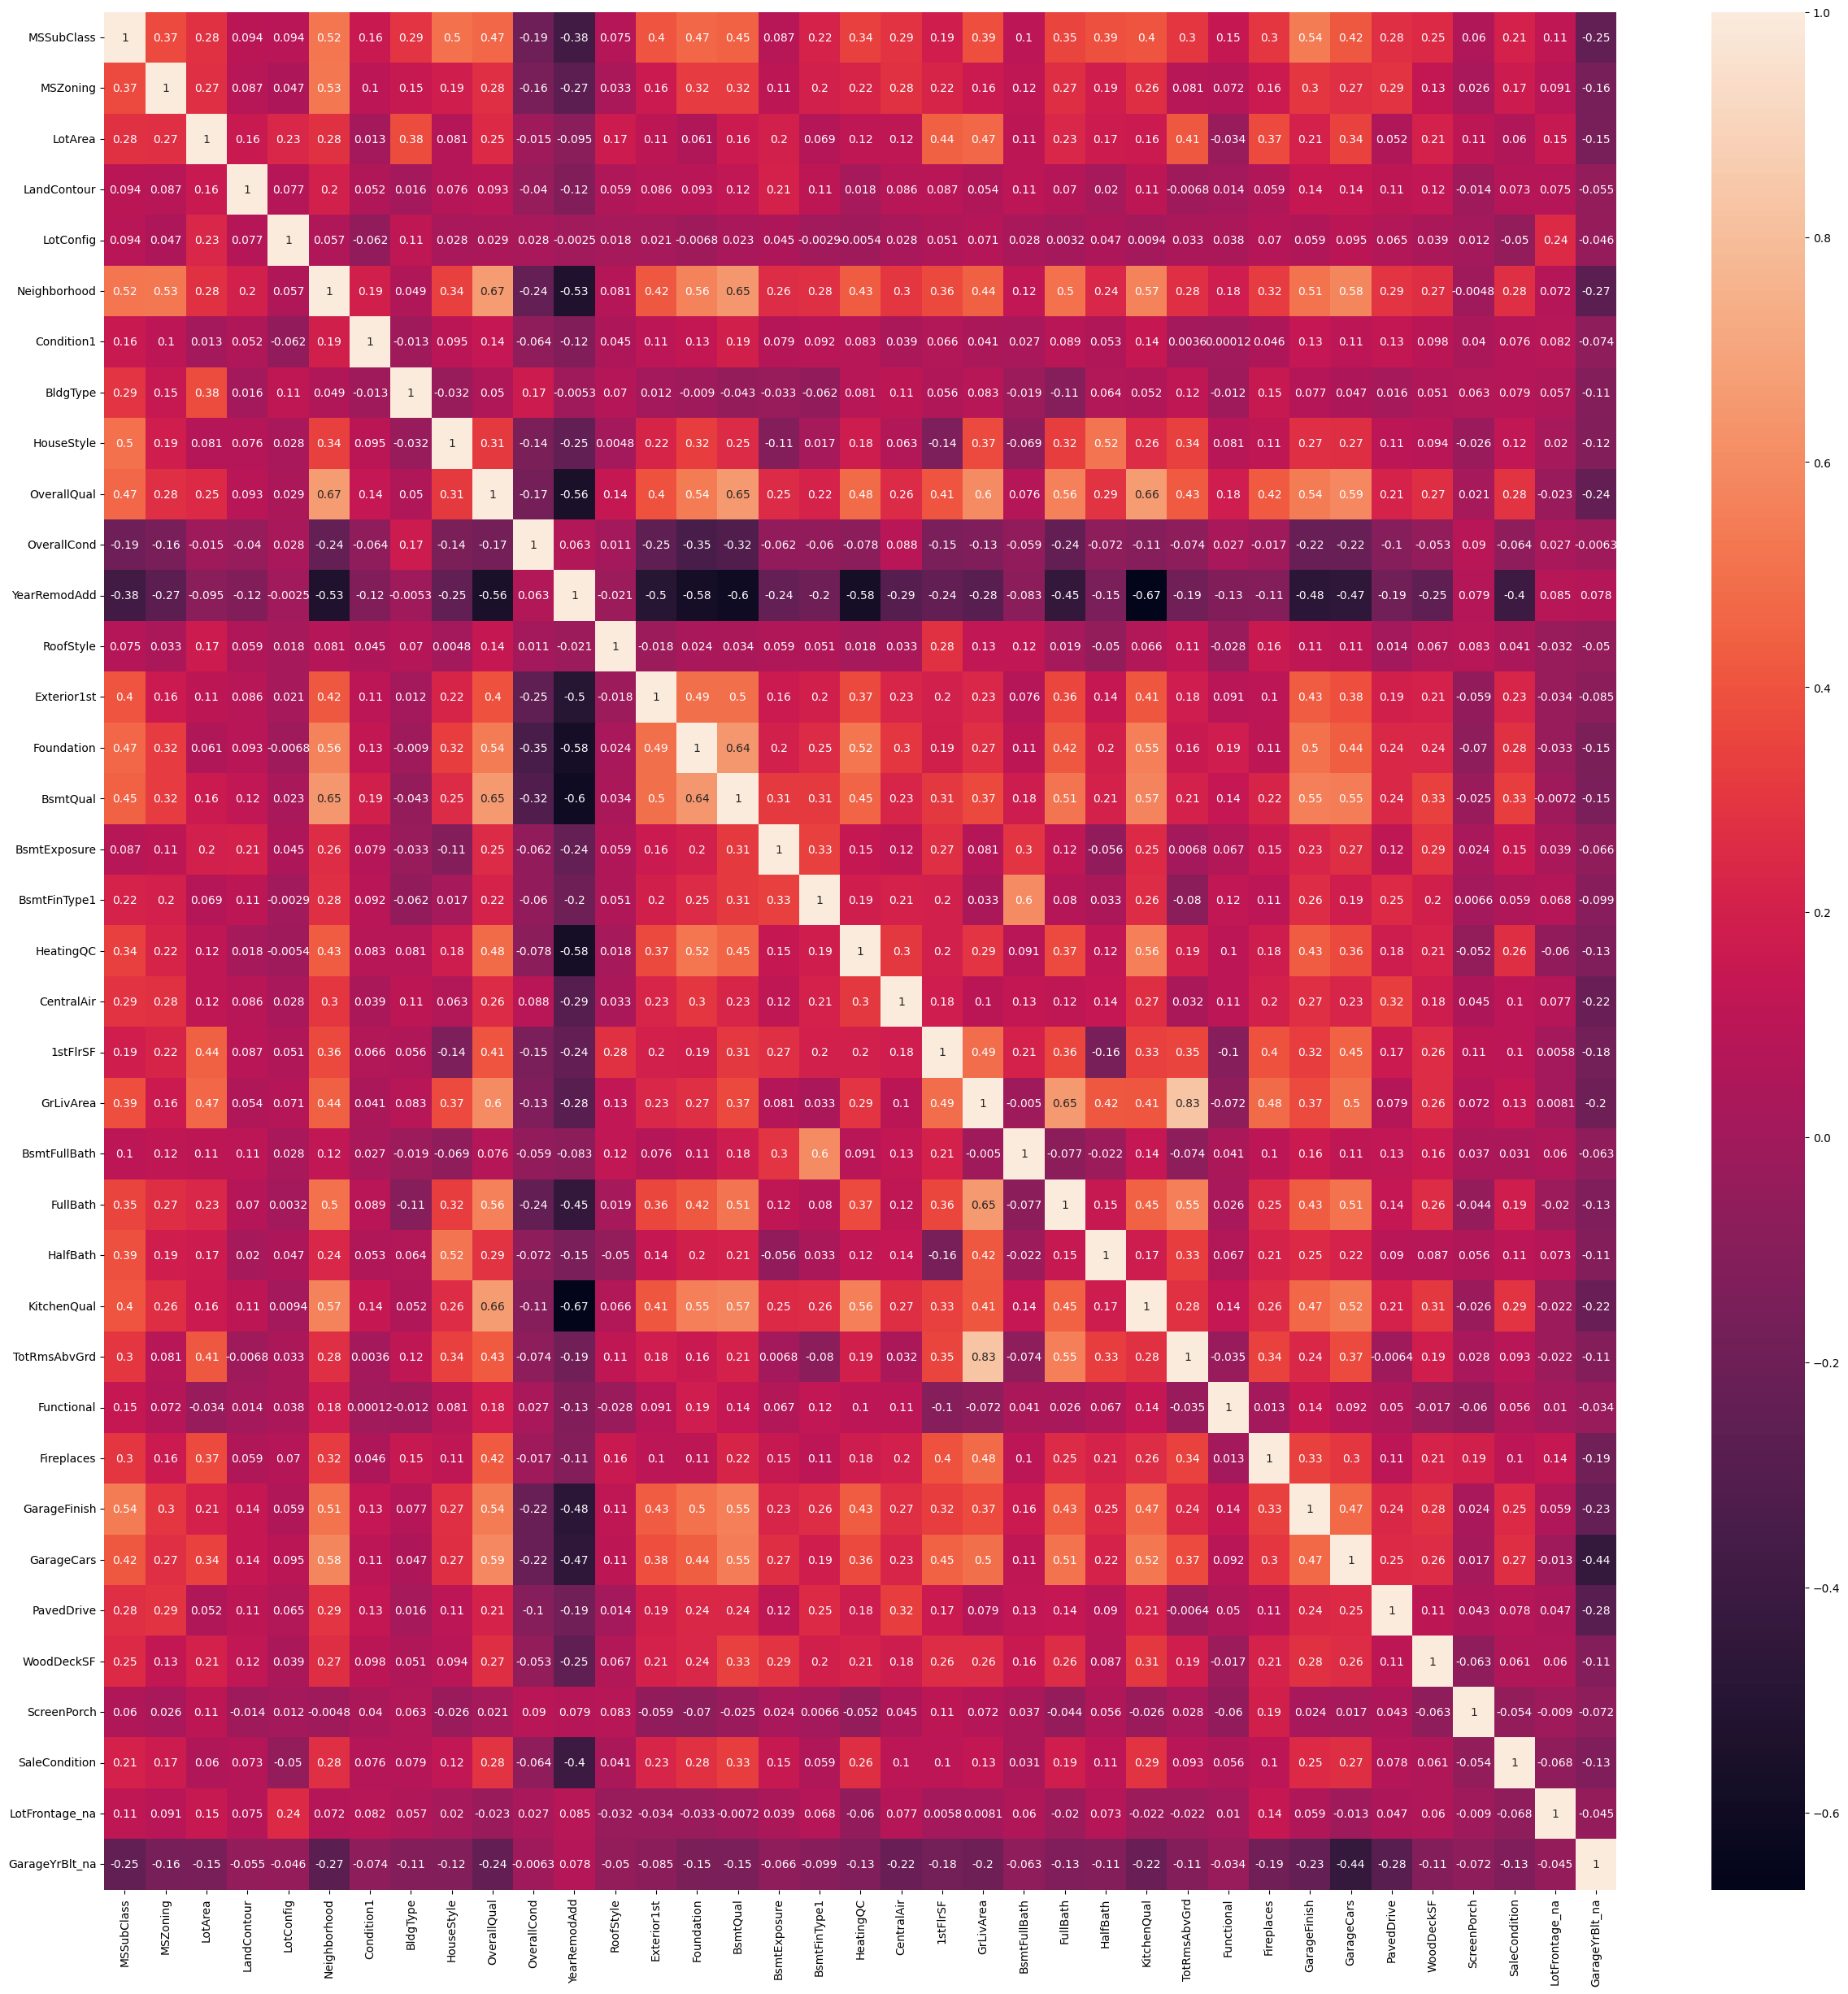

In [545]:
plt.figure(figsize=(30,30))

sns.heatmap(
    X_train.corr(method="spearman"),
    annot=True,
    fmt='.2g'
)
plt.show()

In [546]:
X_train = X_train.drop("GrLivArea",axis=1)
X_test = X_test.drop("GrLivArea",axis=1)

In [577]:
X_train

MSSubClass  MSZoning   LotArea  LandContour  LotConfig  Neighborhood  \
Id                                                                           
136     0.750000      0.75  0.388016     0.333333        0.0      0.500000   
1453    0.083333      0.25  0.190772     0.333333        0.0      0.181818   
763     1.000000      1.00  0.352394     0.333333        0.0      0.818182   
933     0.750000      0.75  0.410255     0.333333        0.5      0.818182   
436     1.000000      0.75  0.392902     0.333333        1.0      0.681818   
...          ...       ...       ...          ...        ...           ...   
1096    0.750000      0.75  0.366864     0.333333        0.0      0.681818   
1131    0.416667      0.75  0.332929     0.333333        0.0      0.318182   
1295    0.750000      0.75  0.341735     0.333333        0.0      0.181818   
861     0.416667      0.75  0.328924     0.333333        0.5      0.727273   
1127    0.916667      0.75  0.191228     0.333333        0.0      0.636364   

      Condition1  BldgType  HouseStyle  OverallQual  OverallCond  \
Id                                                                 
136          0.8      1.00         0.8     0.666667        0.625   
1453         0.8      0.75         0.6     0.444444        0.500   
763          0.8      1.00         1.0     0.666667        0.500   
933          0.4      1.00         0.8     0.888889        0.500   
436          1.0      1.00         1.0     0.666667        0.625   
...          ...       ...         ...          ...          ...   
1096         0.8      1.00         0.8     0.555556        0.500   
1131         0.8      1.00         0.2     0.333333        0.250   
1295         0.8      1.00         0.8     0.444444        0.750   
861          0.8      1.00         0.2     0.666667        0.875   
1127         0.8      0.75         0.8     0.666667        0.500   

      YearRemodAdd  RoofStyle  Exterior1st  Foundation  BsmtQual  \
Id                                                                 
136       0.639344        1.0          0.7        1.00  0.333333   
1453      0.032787        0.0          0.9        1.00  0.666667   
763       0.032787        0.0          0.9        1.00  0.666667   
933       0.032787        1.0          0.9        1.00  1.000000   
436       0.229508        0.0          0.9        1.00  0.666667   
...            ...        ...          ...         ...       ...   
1096      0.032787        0.0          0.9        1.00  0.666667   
1131      0.983607        0.0          0.3        0.25  0.333333   
1295      0.278689        1.0          0.3        0.50  0.333333   
861       0.163934        0.0          0.2        0.25  0.333333   
1127      0.049180        1.0          0.9        1.00  0.666667   

      BsmtExposure  BsmtFinType1  HeatingQC  CentralAir  1stFlrSF  \
Id                                                                  
136       0.000000           0.0       0.75         1.0  0.611775   
1453      1.000000           1.0       0.75         1.0  0.441306   
763       0.333333           1.0       1.00         1.0  0.313126   
933       0.000000           0.0       1.00         1.0  0.658889   
436       0.666667           1.0       1.00         1.0  0.343112   
...            ...           ...        ...         ...       ...   
1096      0.000000           1.0       0.75         1.0  0.518336   
1131      0.000000           0.6       0.50         1.0  0.522347   
1295      0.000000           0.4       0.50         1.0  0.359675   
861       0.000000           0.0       0.75         1.0  0.380136   
1127      0.000000           0.0       1.00         1.0  0.582064   

      BsmtFullBath  FullBath  HalfBath  KitchenQual  TotRmsAbvGrd  Functional  \
Id                                                                              
136       0.000000  0.666667       0.0     0.333333      0.416667        1.00   
1453      0.333333  0.333333       0.0     0.333333      0.250000        1.00   

# Machine Learning

In [547]:
lin_model = Lasso(alpha=0.001, random_state=0)

# train the model
lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [548]:
# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    root_mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()


# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    root_mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 835657954
train rmse: 28907
train r2: 0.8611535306239142

test mse: 774945114
test rmse: 27837
test r2: 0.8889460157461146

Average house price:  165000


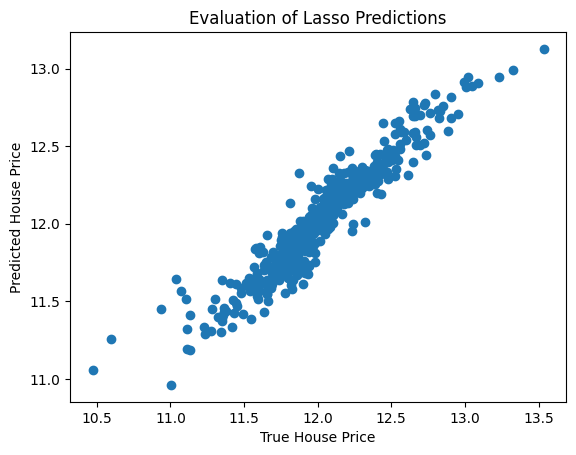

In [549]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')
plt.show()